# EDA Marketing Campaign Kelompok 2
## written by : Saip

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 15, 15
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

In [3]:
df = pd.read_csv('marketing/marketing_campaign.csv', sep = ';')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

Pengamatan:

Data terdiri dari 2240 baris <br>
Tampak beberapa kolom masih memiliki null/missing values yaitu kolom : Income <br>
dt_customer adalah tanggal, maka sebaiknya diubah tipe datanya jadi date <br>

In [6]:
df['Dt_Customer']= pd.to_datetime(df['Dt_Customer'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [8]:
df.sample(5)

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
261    1184        1968         PhD       Divorced  69674.0        0   
63     6518        1951         PhD          Widow  67680.0        0   
158    9970        1977  Graduation       Together  55375.0        0   
1855   2886        1971      Master       Divorced  74290.0        0   
328   10350        1950         PhD        Married  54432.0        2   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
261          2  2013-05-22       46       554  ...                  5   
63           1  2013-06-11        8       546  ...                  5   
158          1  2013-10-17        3        42  ...                  2   
1855         1  2013-08-12       70      1121  ...                  6   
328          1  2013-05-09       37        33  ...                  4   

      AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
261              0             0             0             0             0   
63               0             0             0             0             0   
158              0             0             0             0             0   
1855             0             1             0             1             0   
328              0             0             0             0             0   

      Complain  Z_CostContact  Z_Revenue  Response  
261          0              3         11         0  
63           0              3         11         0  
158          0              3         11         0  
1855         0              3         11         0  
328          0              3         11         0  

[5 rows x 29 columns]

## Statistical Summary

In [9]:
numericals = df.select_dtypes(include='number').columns
numericals = numericals.drop(['ID'])
categoricals = df.select_dtypes(include='object').columns
time = ['Dt_Customer']
print(numericals)
print(categoricals)
print(time)

Index(['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')
Index(['Education', 'Marital_Status'], dtype='object')
['Dt_Customer']


In [10]:
df[numericals].describe()

Year_Birth         Income      Kidhome     Teenhome      Recency  \
count  2240.000000    2216.000000  2240.000000  2240.000000  2240.000000   
mean   1968.805804   52247.251354     0.444196     0.506250    49.109375   
std      11.984069   25173.076661     0.538398     0.544538    28.962453   
min    1893.000000    1730.000000     0.000000     0.000000     0.000000   
25%    1959.000000   35303.000000     0.000000     0.000000    24.000000   
50%    1970.000000   51381.500000     0.000000     0.000000    49.000000   
75%    1977.000000   68522.000000     1.000000     1.000000    74.000000   
max    1996.000000  666666.000000     2.000000     2.000000    99.000000   

          MntWines    MntFruits  MntMeatProducts  MntFishProducts  \
count  2240.000000  2240.000000      2240.000000      2240.000000   
mean    303.935714    26.302232       166.950000        37.525446   
std     336.597393    39.773434       225.715373        54.628979   
min       0.000000     0.000000         0.000000         0.000000   
25%      23.750000     1.000000        16.000000         3.000000   
50%     173.500000     8.000000        67.000000        12.000000   
75%     504.250000    33.000000       232.000000        50.000000   
max    1493.000000   199.000000      1725.000000       259.000000   

       MntSweetProducts  ...  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
count       2240.000000  ...        2240.000000   2240.000000   2240.000000   
mean          27.062946  ...           5.316518      0.072768      0.074554   
std           41.280498  ...           2.426645      0.259813      0.262728   
min            0.000000  ...           0.000000      0.000000      0.000000   
25%            1.000000  ...           3.000000      0.000000      0.000000   
50%            8.000000  ...           6.000000      0.000000      0.000000   
75%           33.000000  ...           7.000000      0.000000      0.000000   
max          263.000000  ...          20.000000      1.000000      1.000000   

       AcceptedCmp5  AcceptedCmp1  AcceptedCmp2     Complain  Z_CostContact  \
count   2240.000000   2240.000000   2240.000000  2240.000000         2240.0   
mean       0.072768      0.064286      0.013393     0.009375            3.0   
std        0.259813      0.245316      0.114976     0.096391            0.0   
min        0.000000      0.000000      0.000000     0.000000            3.0   
25%        0.000000      0.000000      0.000000     0.000000            3.0   
50%        0.000000      0.000000      0.000000     0.000000            3.0   
75%        0.000000      0.000000      0.000000     0.000000            3.0   
max        1.000000      1.000000      1.000000     1.000000            3.0   

       Z_Revenue     Response  
count     2240.0  2240.000000  
mean        11.0     0.149107  
std          0.0     0.356274  
min         11.0     0.000000  
25%         11.0     0.000000  
50%         11.0     0.000000  
75%         11.0     0.000000  
max         11.0     1.000000  

[8 rows x 25 columns]

jika mean dan median berbeda cukup jauh, bisa dianggap kemungkinan skew <br>
data yang mungkin skew : Income, Kidhome, Teenhome, MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts <br>
terdapat nilai tidak umum pada nilai max kolom : income <br>
kolom yang ternyata boolean :AcceptedCmp3	AcceptedCmp4	AcceptedCmp5	AcceptedCmp1	AcceptedCmp2	Complain  Response <br>


In [11]:
df[categoricals].describe()

Education Marital_Status
count         2240           2240
unique           5              8
top     Graduation        Married
freq          1127            864

In [12]:
for col in categoricals:
    print(f'''Value count kolom {col}:''')
    print(df[col].value_counts())
    print()

Value count kolom Education:
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

Value count kolom Marital_Status:
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64



kurang lebih dari 50 % data education : graduation (timpang datanya) <br>

In [13]:
df[time].describe()

<ipython-input-13-796bf15cc90c>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df[time].describe()


Dt_Customer
count                  2240
unique                  663
top     2012-08-31 00:00:00
freq                     12
first   2012-07-30 00:00:00
last    2014-06-29 00:00:00

In [14]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

data income memiliki nilai null, namun karena sedikit, bisa dihapus atau imputasi dengan nilai median income

## Plotting Data, Visualisasi Sederhana

### Data Numerik

In [15]:
numericals

Index(['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [16]:
numericals1 = ['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency']
numericals1

['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency']

In [17]:
numericals2 = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds']
numericals2

['MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds']

In [27]:
# numericals3 = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
#                'NumWebVisitsMonth', 'Z_CostContact', 'Z_Revenue']
numericals3 = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
               'NumWebVisitsMonth']
numericals3

['NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth']

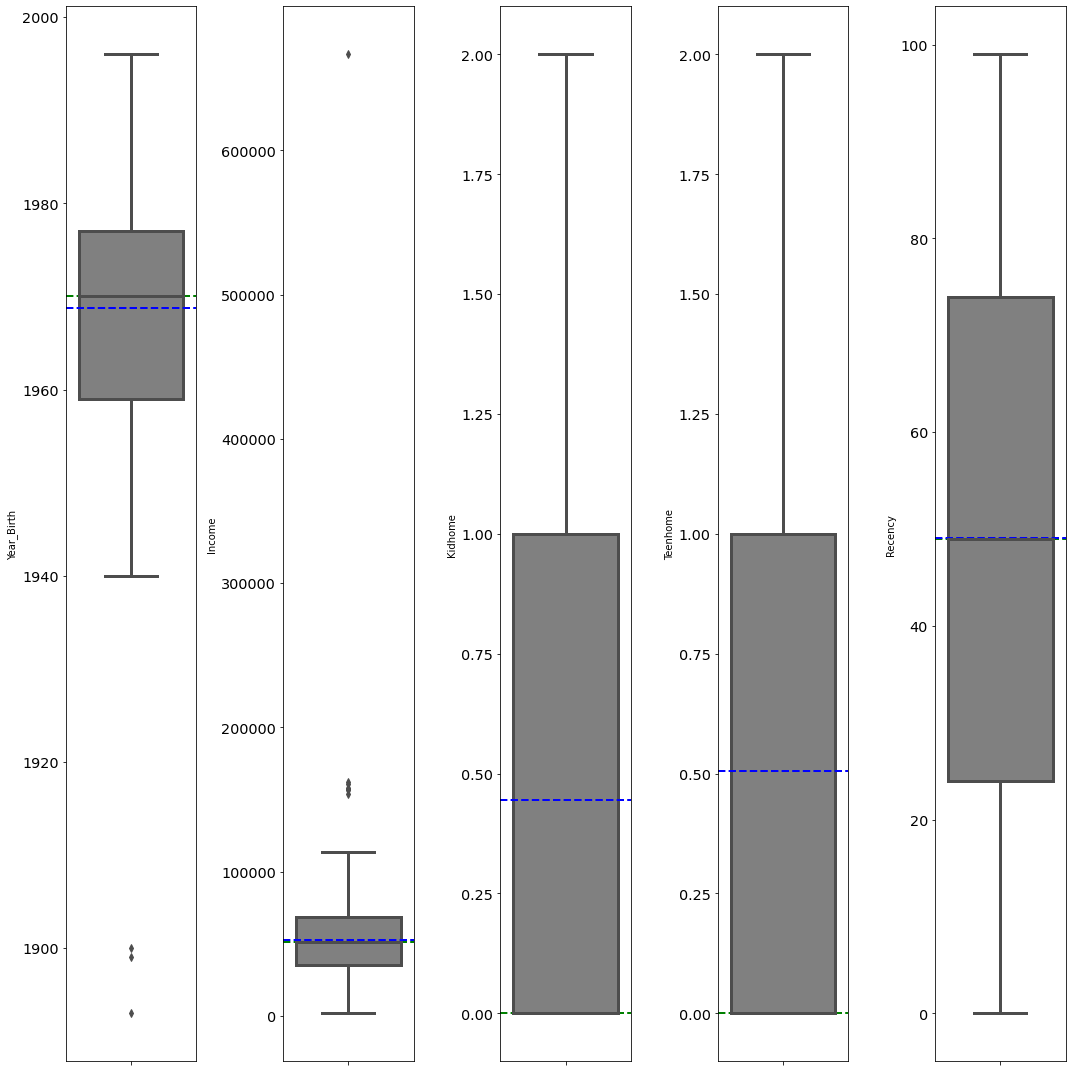

In [35]:
for i in range(0, len(numericals1)):
    plt.subplot(1, len(numericals1), i+1)
    sns.boxplot(y=df[numericals1[i]], color='gray', orient='v')
    plt.axhline(df[numericals1[i]].quantile(0.5), color='green', linestyle='dashed', linewidth=2)
    plt.axhline(df[numericals1[i]].mean(), color='blue', linestyle='dashed', linewidth=2)
    plt.tight_layout()

outliers yang mungkin perlu dihapus : tahun lahir, income <br>
Distribusi Data : <br>
year_birth, mean < median : negatif skew <br>
income, mean hampir mendekati median, bisa dianggap normal <br>
else : distribusinormal

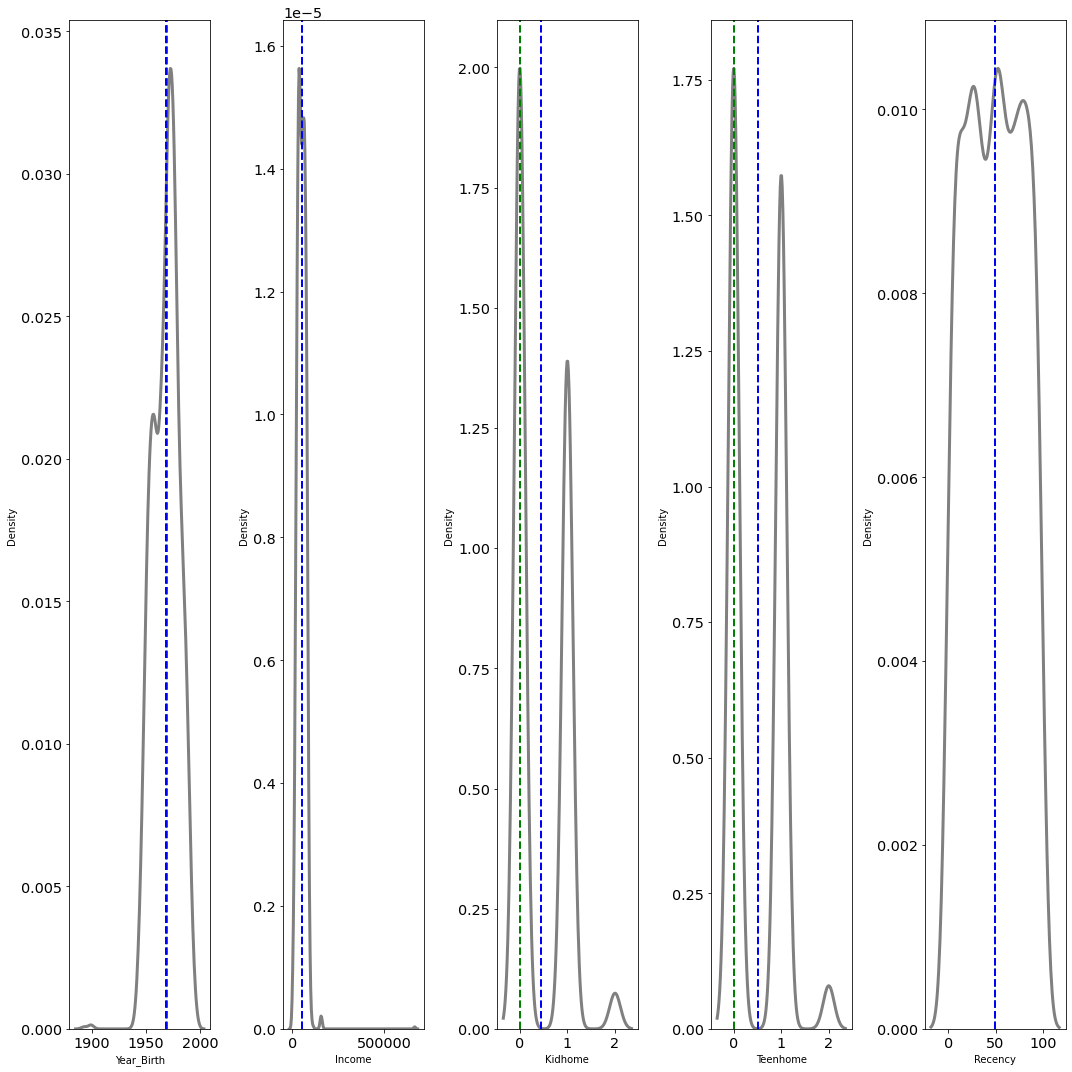

In [50]:
for i in range(0, len(numericals1)):
    plt.subplot(1, len(numericals1), i+1)
    sns.kdeplot(df[numericals1[i]], color='gray')
    plt.axvline(df[numericals1[i]].quantile(0.5), color='green', linestyle='dashed', linewidth=2)
    plt.axvline(df[numericals1[i]].mean(), color='blue', linestyle='dashed', linewidth=2)
    plt.tight_layout()

Distribusi Data : <br>
year_birth, mean terlihat hampir sama dengan median, tetapi dari boxplot diketahui : negatif skew <br>
income, mean hampir mendekati median, bisa dianggap normal, grafik cendrung kekiri karena outliers <br>
kidhome, teenhome : bimodal
recency : normal

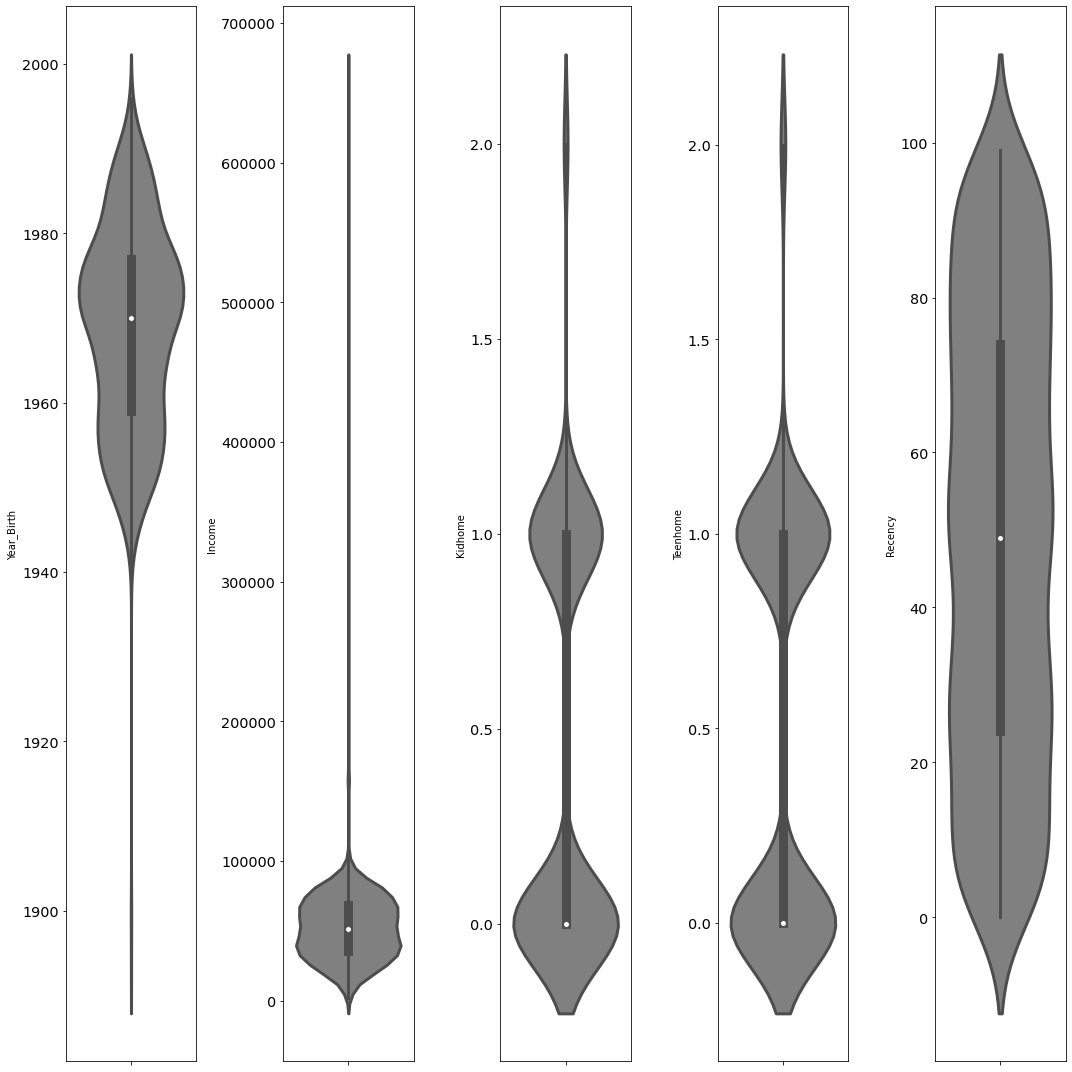

In [41]:
for i in range(0, len(numericals1)):
    plt.subplot(1, len(numericals1), i+1)
    sns.violinplot(y=df[numericals1[i]], color='gray', orient='v')
    plt.tight_layout()

persebaran data : <br>
year_birth : menumpuk di 1940 - 2000 <br>
income : menumpuk 0 - 100000 <br>
kidhome, teenhome : 0, 1 <br>
recency : merata

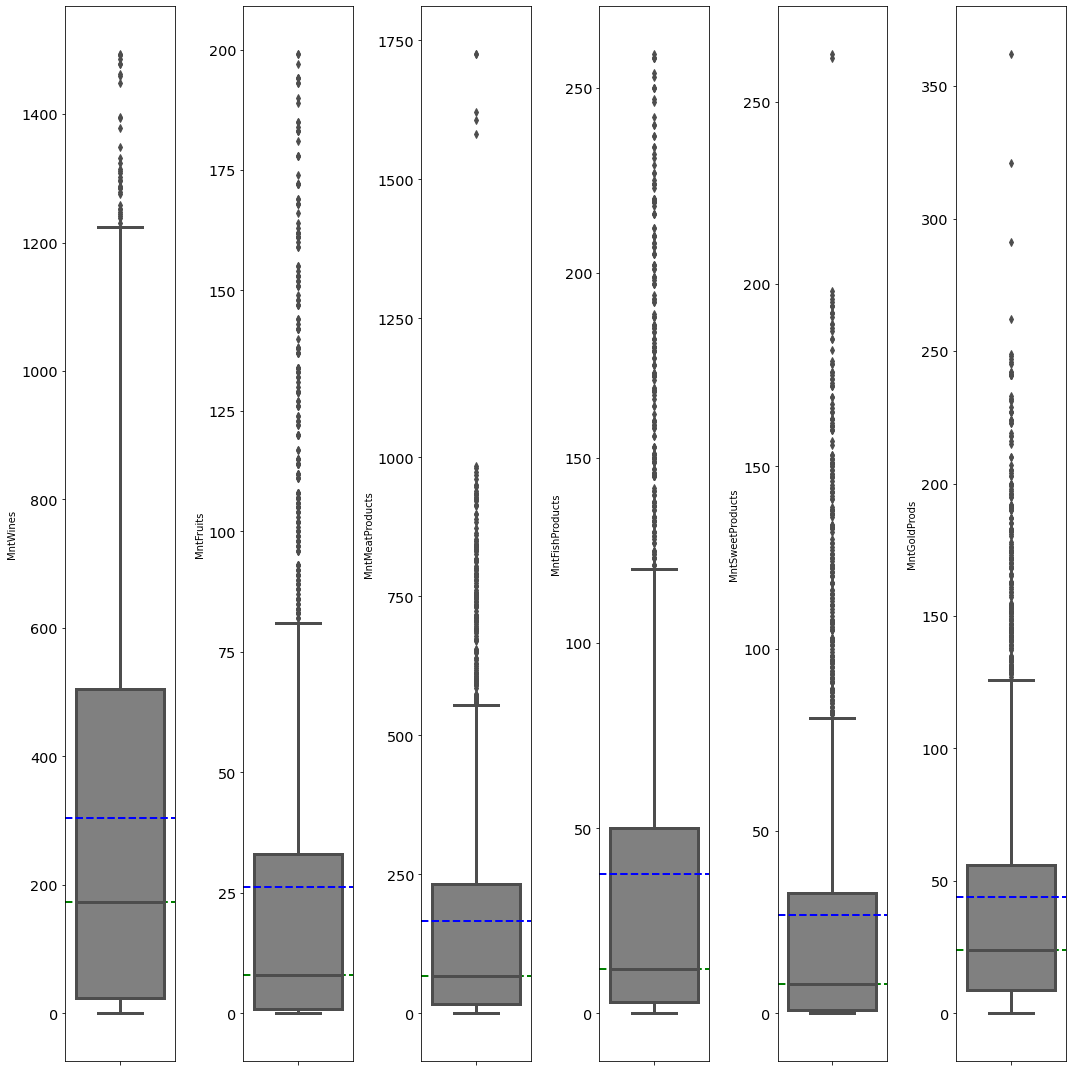

In [36]:
for i in range(0, len(numericals2)):
    plt.subplot(1, len(numericals2), i+1)
    sns.boxplot(y=df[numericals2[i]], color='gray', orient='v')
    plt.axhline(df[numericals2[i]].quantile(0.5), color='green', linestyle='dashed', linewidth=2)
    plt.axhline(df[numericals2[i]].mean(), color='blue', linestyle='dashed', linewidth=2)
    plt.tight_layout()

Terdapat Outliers pada mnt seluruh produk <br>
seluruh produk : mean > median, positif skew

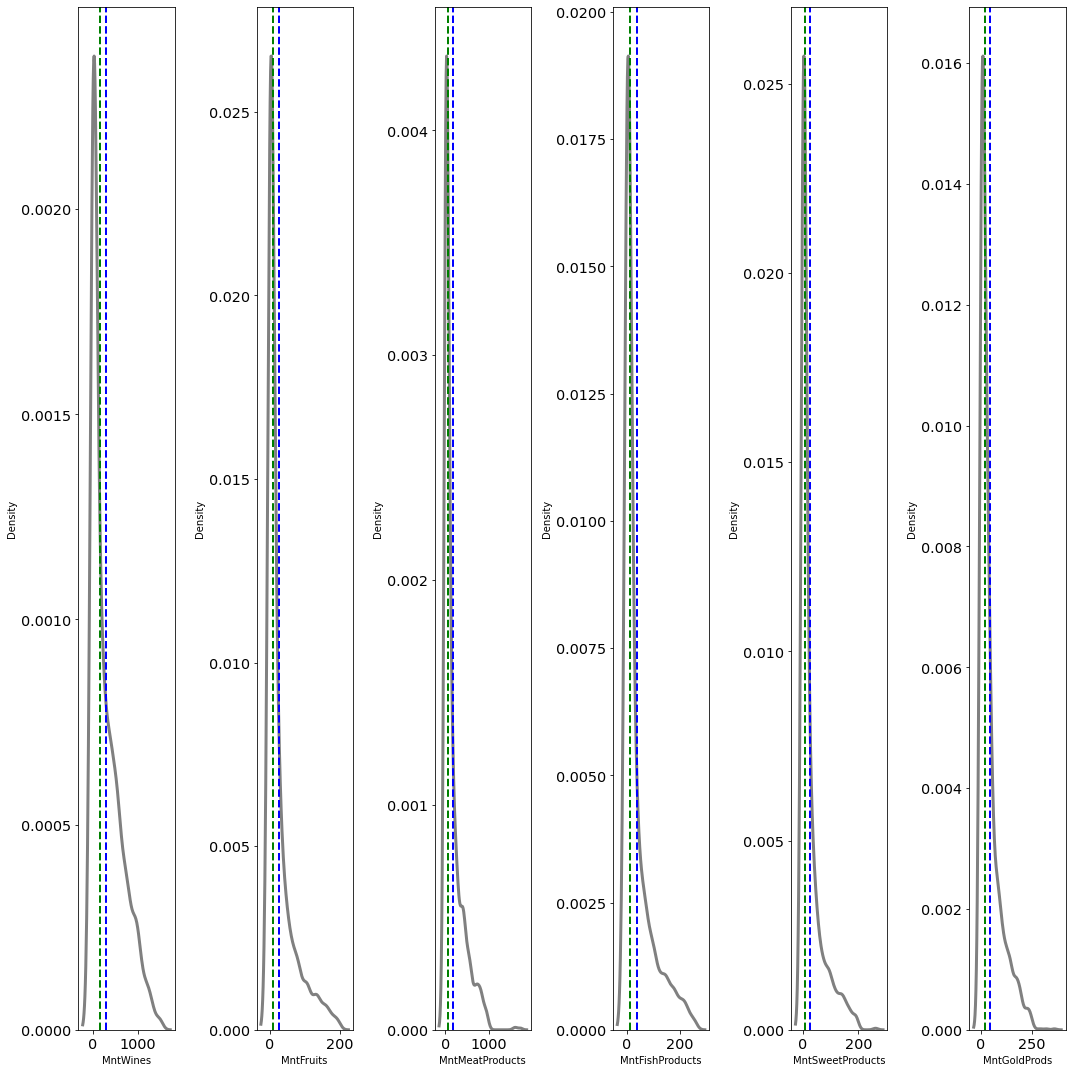

In [49]:
for i in range(0, len(numericals2)):
    plt.subplot(1, len(numericals2), i+1)
    sns.kdeplot(df[numericals2[i]], color='gray')
    plt.axvline(df[numericals2[i]].quantile(0.5), color='green', linestyle='dashed', linewidth=2)
    plt.axvline(df[numericals2[i]].mean(), color='blue', linestyle='dashed', linewidth=2)
    plt.tight_layout()

semua mnt produk positif skew

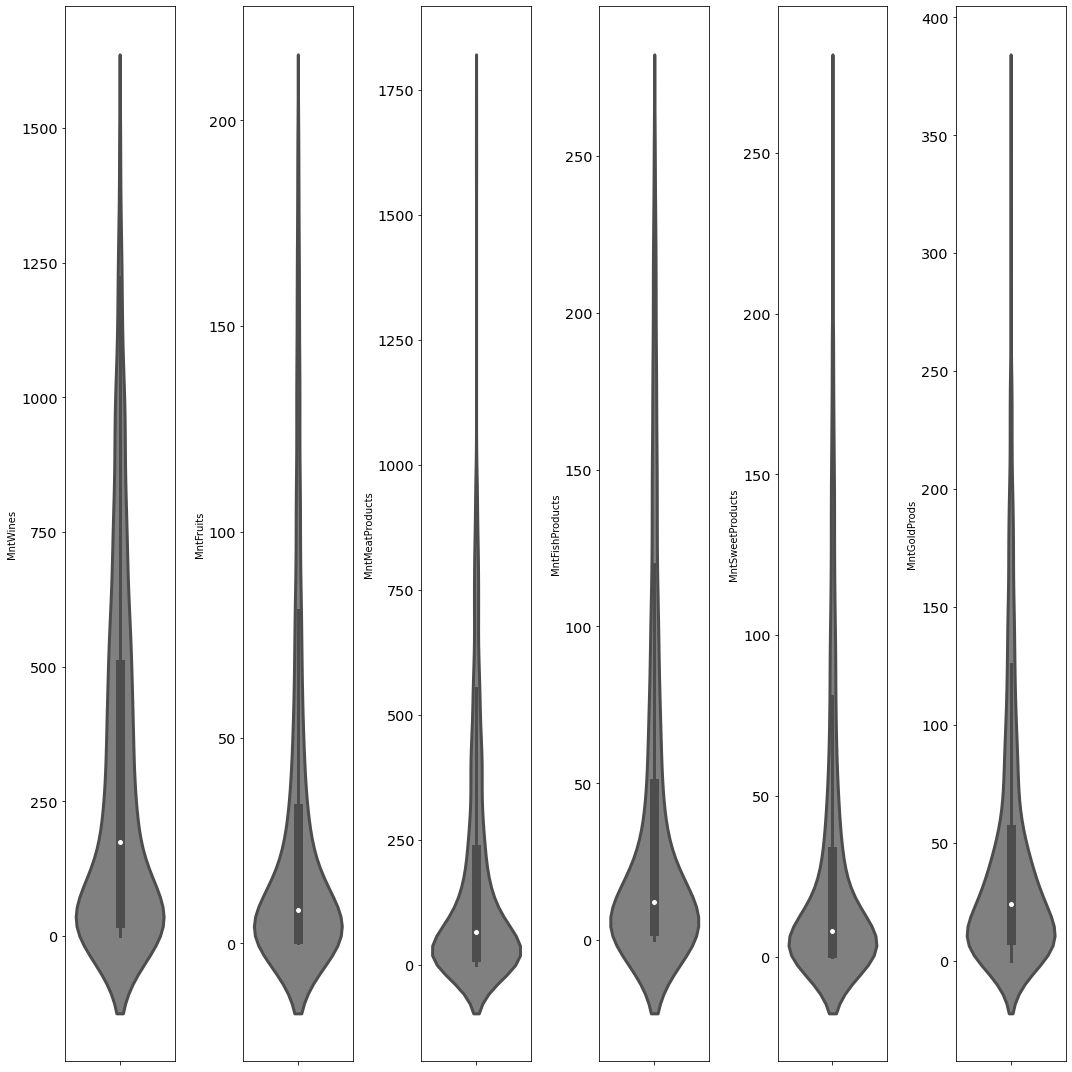

In [113]:
for i in range(0, len(numericals2)):
    plt.subplot(1, len(numericals2), i+1)
    sns.violinplot(y=df[numericals2[i]], color='gray', orient='v')
    plt.tight_layout()

semua produk, menumpuk di awal data, atau jumlah rendah

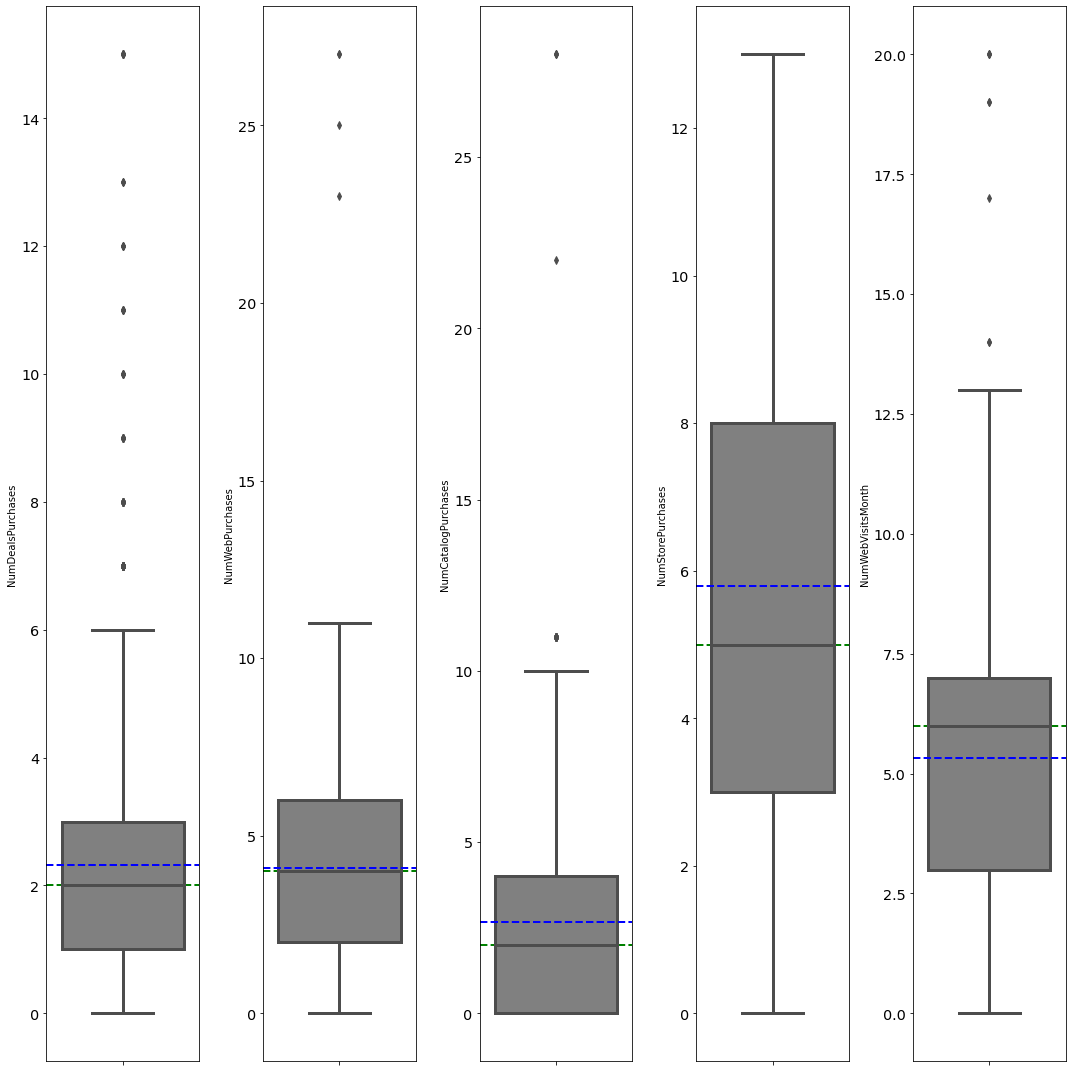

In [38]:
for i in range(0, len(numericals3)):
    plt.subplot(1, len(numericals3), i+1)
    sns.boxplot(y=df[numericals3[i]], color='gray', orient='v')
    plt.axhline(df[numericals3[i]].quantile(0.5), color='green', linestyle='dashed', linewidth=2)
    plt.axhline(df[numericals3[i]].mean(), color='blue', linestyle='dashed', linewidth=2)
    plt.tight_layout()

terdapat outliers, kecuali pada numstore purchase <br>
distribusi data : <br>
numwebvisitmonth : mean < median, negatif skew <br>
numwebpurchase : mean hampir sama dengan median, bisa dianggap normal <br>
selain itu : mean > median, positif skew

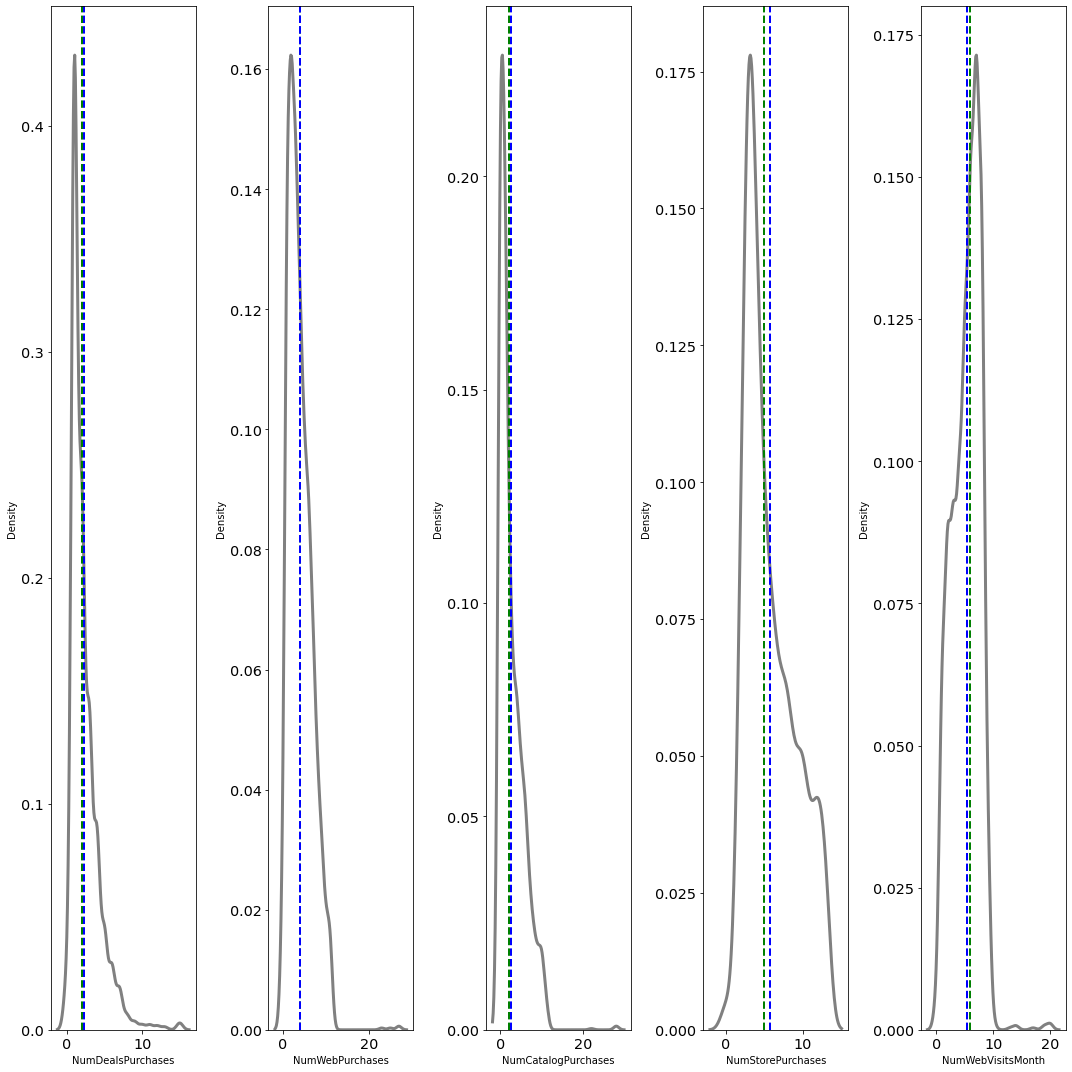

In [48]:
for i in range(0, len(numericals3)):
    plt.subplot(1, len(numericals3), i+1)
    sns.kdeplot(df[numericals3[i]], color='gray')
    plt.axvline(df[numericals3[i]].quantile(0.5), color='green', linestyle='dashed', linewidth=2)
    plt.axvline(df[numericals3[i]].mean(), color='blue', linestyle='dashed', linewidth=2)
    plt.tight_layout()

distribusi data : <br>
numwebvisitmonth : mean < median, negatif skew <br>
numwebpurchase : mean hampir sama dengan median, bisa dianggap normal <br>
selain itu : mean > median, positif skew

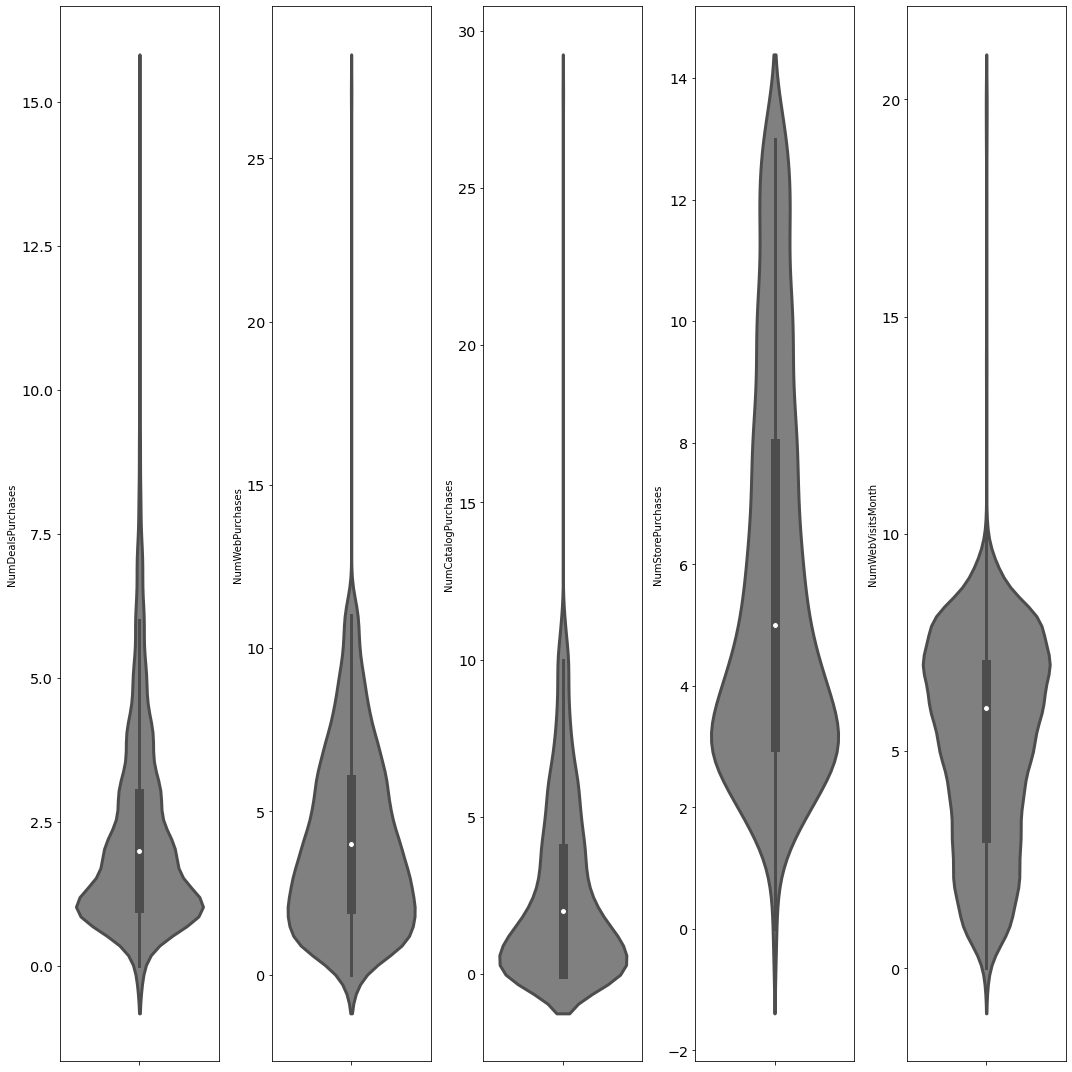

In [30]:
for i in range(0, len(numericals3)):
    plt.subplot(1, len(numericals3), i+1)
    sns.violinplot(y=df[numericals3[i]], color='gray', orient='v')
    plt.tight_layout()

### Data Categorik

In [43]:
categoricals1 = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Complain', 'Response']

C:\Users\asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


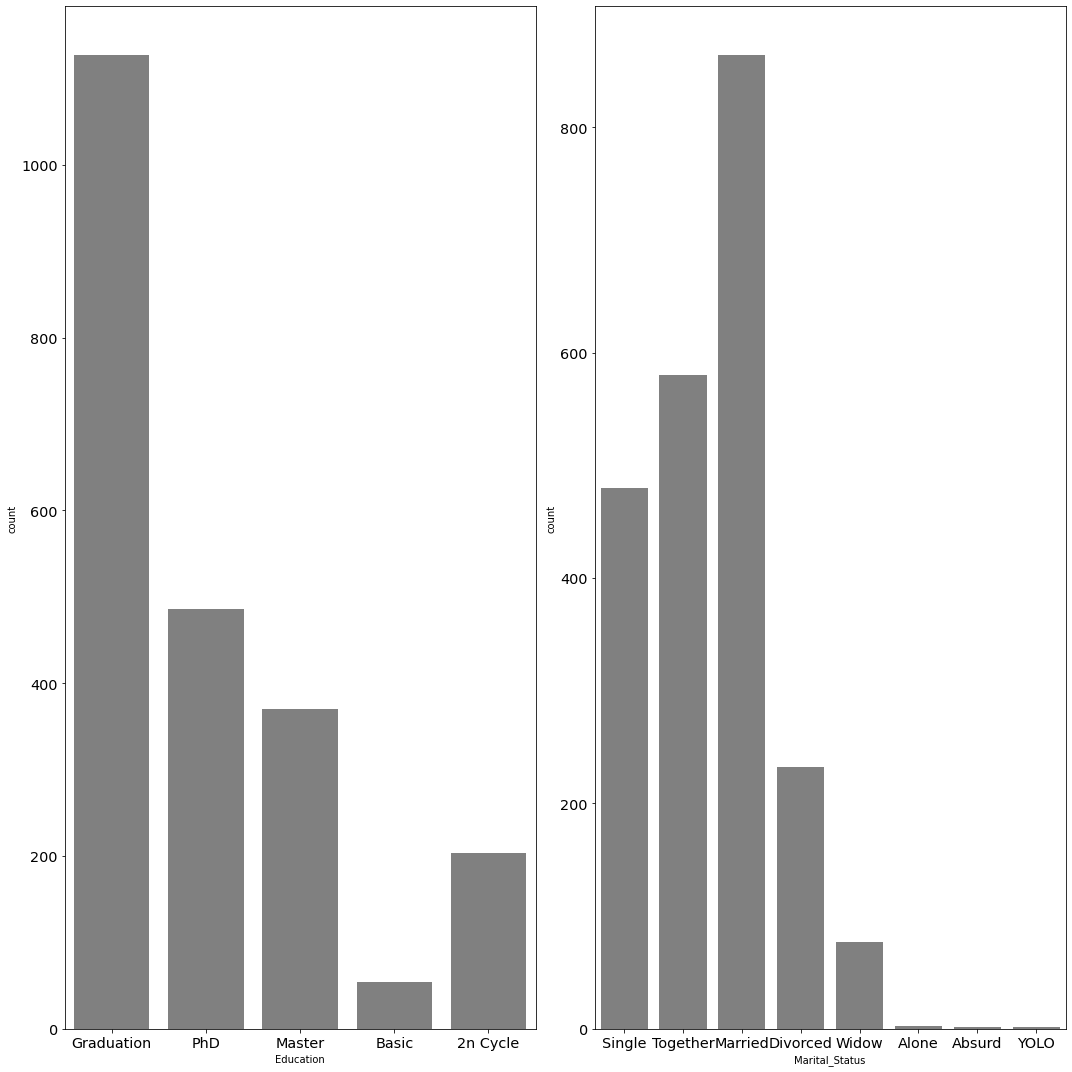

In [44]:
for i in range(0, len(categoricals)):
    plt.subplot(1, len(categoricals), i+1)
    sns.countplot(df[categoricals[i]], color='gray', orient='h')
    plt.tight_layout()

C:\Users\asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\asus\anaconda3\lib\site-p

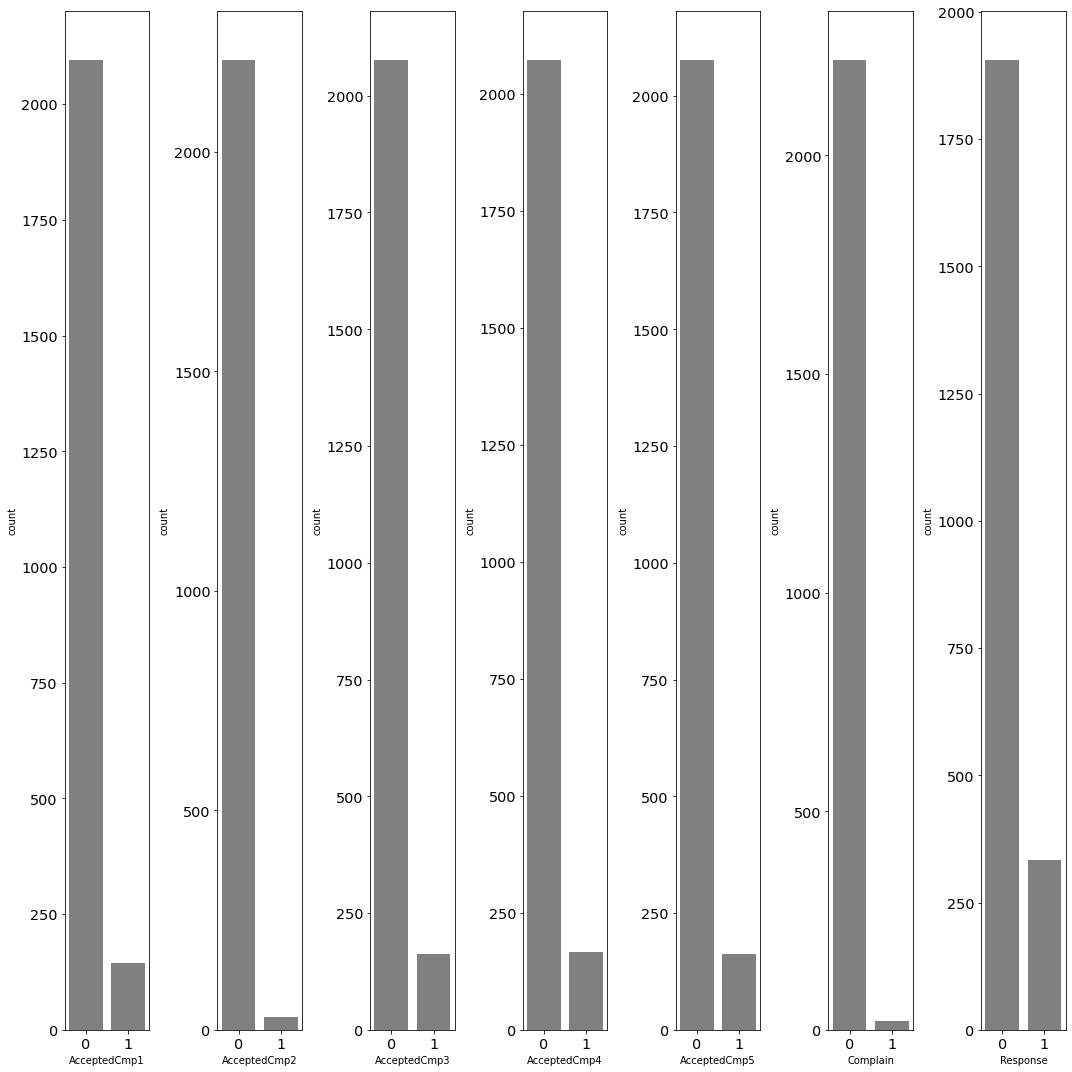

In [45]:
for i in range(0, len(categoricals1)):
    plt.subplot(1, len(categoricals1), i+1)
    sns.countplot(df[categoricals1[i]], color='gray', orient='h')
    plt.tight_layout()

### Korelasi Data

In [46]:
df.corr()

ID  Year_Birth    Income   Kidhome  Teenhome  \
ID                   1.000000    0.000028  0.013095  0.002406 -0.002580   
Year_Birth           0.000028    1.000000 -0.161791  0.230176 -0.352111   
Income               0.013095   -0.161791  1.000000 -0.428669  0.019133   
Kidhome              0.002406    0.230176 -0.428669  1.000000 -0.036133   
Teenhome            -0.002580   -0.352111  0.019133 -0.036133  1.000000   
Recency             -0.046524   -0.019871 -0.003970  0.008827  0.016198   
MntWines            -0.022878   -0.157773  0.578650 -0.496297  0.004846   
MntFruits            0.004600   -0.017917  0.430842 -0.372581 -0.176764   
MntMeatProducts     -0.004437   -0.030872  0.584633 -0.437129 -0.261160   
MntFishProducts     -0.024475   -0.041625  0.438871 -0.387644 -0.204187   
MntSweetProducts    -0.007642   -0.018133  0.440744 -0.370673 -0.162475   
MntGoldProds        -0.013438   -0.061818  0.325916 -0.349595 -0.021725   
NumDealsPurchases   -0.037166   -0.060846 -0.083101  0.221798  0.387741   
NumWebPurchases     -0.018924   -0.145040  0.387878 -0.361647  0.155500   
NumCatalogPurchases -0.003440   -0.121275  0.589162 -0.502237 -0.110769   
NumStorePurchases   -0.014927   -0.128272  0.529362 -0.499683  0.050695   
NumWebVisitsMonth   -0.007446    0.121139 -0.553088  0.447846  0.134884   
AcceptedCmp3        -0.036040    0.061774 -0.016174  0.014674 -0.042677   
AcceptedCmp4        -0.025387   -0.060510  0.184400 -0.161600  0.038886   
AcceptedCmp5        -0.007517    0.007123  0.335943 -0.205634 -0.191050   
AcceptedCmp1        -0.021614   -0.005930  0.276820 -0.172339 -0.140090   
AcceptedCmp2        -0.015061   -0.006539  0.087545 -0.081716 -0.015605   
Complain             0.033883   -0.030128 -0.027225  0.040207  0.003138   
Z_CostContact             NaN         NaN       NaN       NaN       NaN   
Z_Revenue                 NaN         NaN       NaN       NaN       NaN   
Response            -0.021968    0.021325  0.133047 -0.080008 -0.154446   

                      Recency  MntWines  MntFruits  MntMeatProducts  \
ID                  -0.046524 -0.022878   0.004600        -0.004437   
Year_Birth          -0.019871 -0.157773  -0.017917        -0.030872   
Income              -0.003970  0.578650   0.430842         0.584633   
Kidhome              0.008827 -0.496297  -0.372581        -0.437129   
Teenhome             0.016198  0.004846  -0.176764        -0.261160   
Recency              1.000000  0.016064  -0.004306         0.023056   
MntWines             0.016064  1.000000   0.389637         0.562667   
MntFruits           -0.004306  0.389637   1.000000         0.543105   
MntMeatProducts      0.023056  0.562667   0.543105         1.000000   
MntFishProducts      0.001079  0.399753   0.594804         0.568402   
MntSweetProducts     0.022670  0.386581   0.567164         0.523846   
MntGoldProds         0.016693  0.387516   0.392995         0.350609   
NumDealsPurchases   -0.001098  0.010940  -0.132114        -0.122415   
NumWebPurchases     -0.010726  0.542265   0.296735         0.293761   
NumCatalogPurchases  0.025110  0.635226   0.487917         0.723827   
NumStorePurchases    0.000799  0.642100   0.461758         0.479659   
NumWebVisitsMonth   -0.021445 -0.320653  -0.418383        -0.539470   
AcceptedCmp3        -0.032991  0.062202   0.014727         0.018272   
AcceptedCmp4         0.018826  0.373286   0.010152         0.102912   
AcceptedCmp5         0.000129  0.472613   0.215833         0.373769   
AcceptedCmp1        -0.019283  0.354133   0.194748         0.309761   
AcceptedCmp2        -0.001781  0.205907  -0.009773         0.043033   
Complain             0.013231 -0.039007  -0.005166        -0.023483   
Z_CostContact             NaN       NaN        NaN              NaN   
Z_Revenue                 NaN       NaN        NaN              NaN   
Response            -0.198437  0.247254   0.125289         0.236335   

                     MntFishProducts  ...  NumWebVisitsMonth  AcceptedCmp3  \
ID   

<AxesSubplot:>

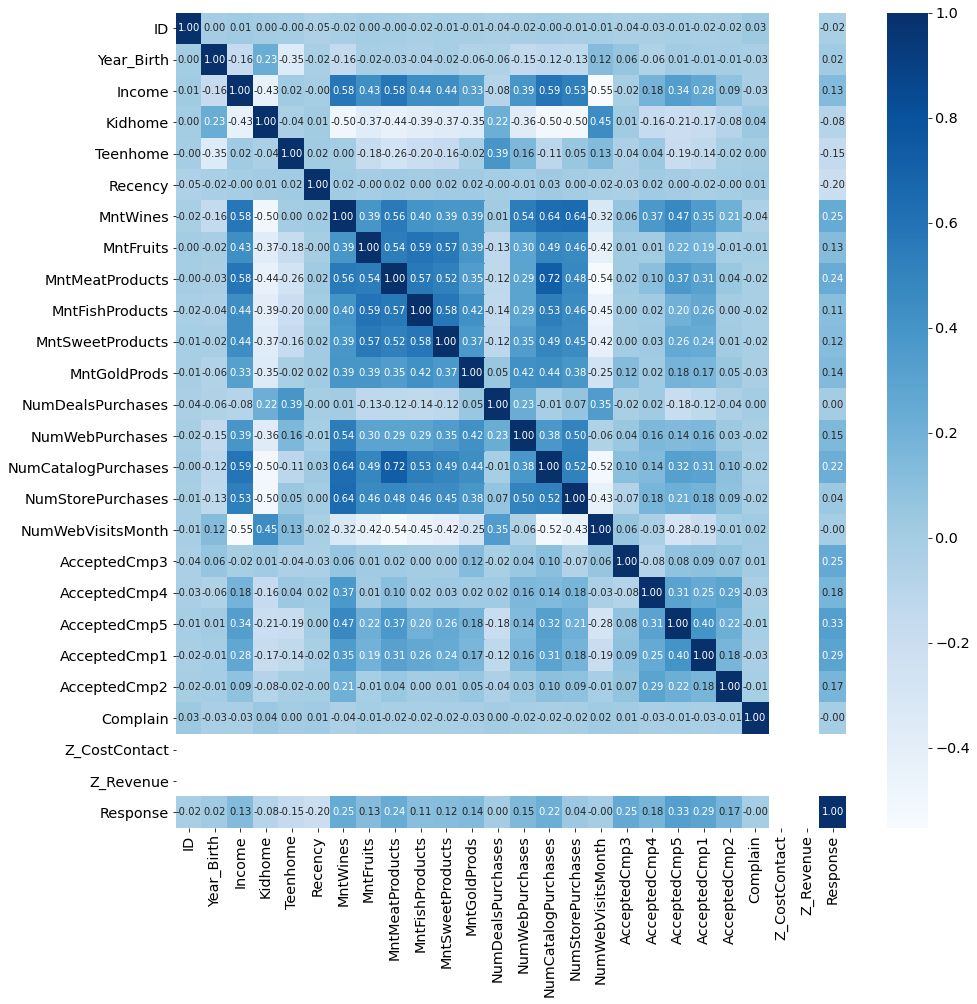

In [47]:
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f')

Data dengan korelasi tinggi : <br>
* income x kidhome, -0.43, yang kaya jarang punya anak kecil <br>
* income x mnt produk, semuanya hampir diatas 0.44 kecuali mntgold <br>
    semakin tinggi income, semakin tinggi spent produk <br>
* income x numwebpurchase, numcatalogpurchase, numstorepurchase, semuanya diatas 0.53 kecuali numwebpurchase <br>
    semakin tinggi income, semakin tinggi sering beli <br>
    tetapi income tidak ada hubungan dgn numdealspurchase (deal dgn diskon) <br>
* income x numweb, -0.55, yang kaya jarang belanja online <br> <br>

* kidhome x numwebvisit, 0.45, semakin banyak anak semakin sering mengunjungi web <br>
* kidhome x numdealpurchase, 0.22, semakin banyak anak semakin suka makai diskon <br>
* kidhome x mntproduk, numpurchase, terkecil -0.35, yang punya anak jarang belanja  <br> <br>

* teenhome x numdealpurchase, 0.22, semakin banyak anak semakin suka makai diskon <br> <br>

* mnt produk saling berkorelasi dg nilai min 0.33 <br>
* mnt produk saling berkorelasi dengan numwebpurchase, numcatalogpurchase, numstorepurchase, minimal 0.29, <br>
* mnt produk x numwebvisit, terkecil -0.25, webvisit tidak menghabiskan banyak uang diproduk <br>
<br>

* numdealpurchase x numwebvisit, 0.35, banyak yang menggunakan diskon adalah orang belanja dgn web <br>
 <br>
 
terdapat beberapa fitur yang korelasi dengan target (diatas 0.2), yaitu : <br>
recency, mntwines, mntmeat, numcatalog, accepcmp3, acceptcmp5, acceptcmp1

C:\Users\asus\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\asus\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 1080x1080 with 0 Axes>

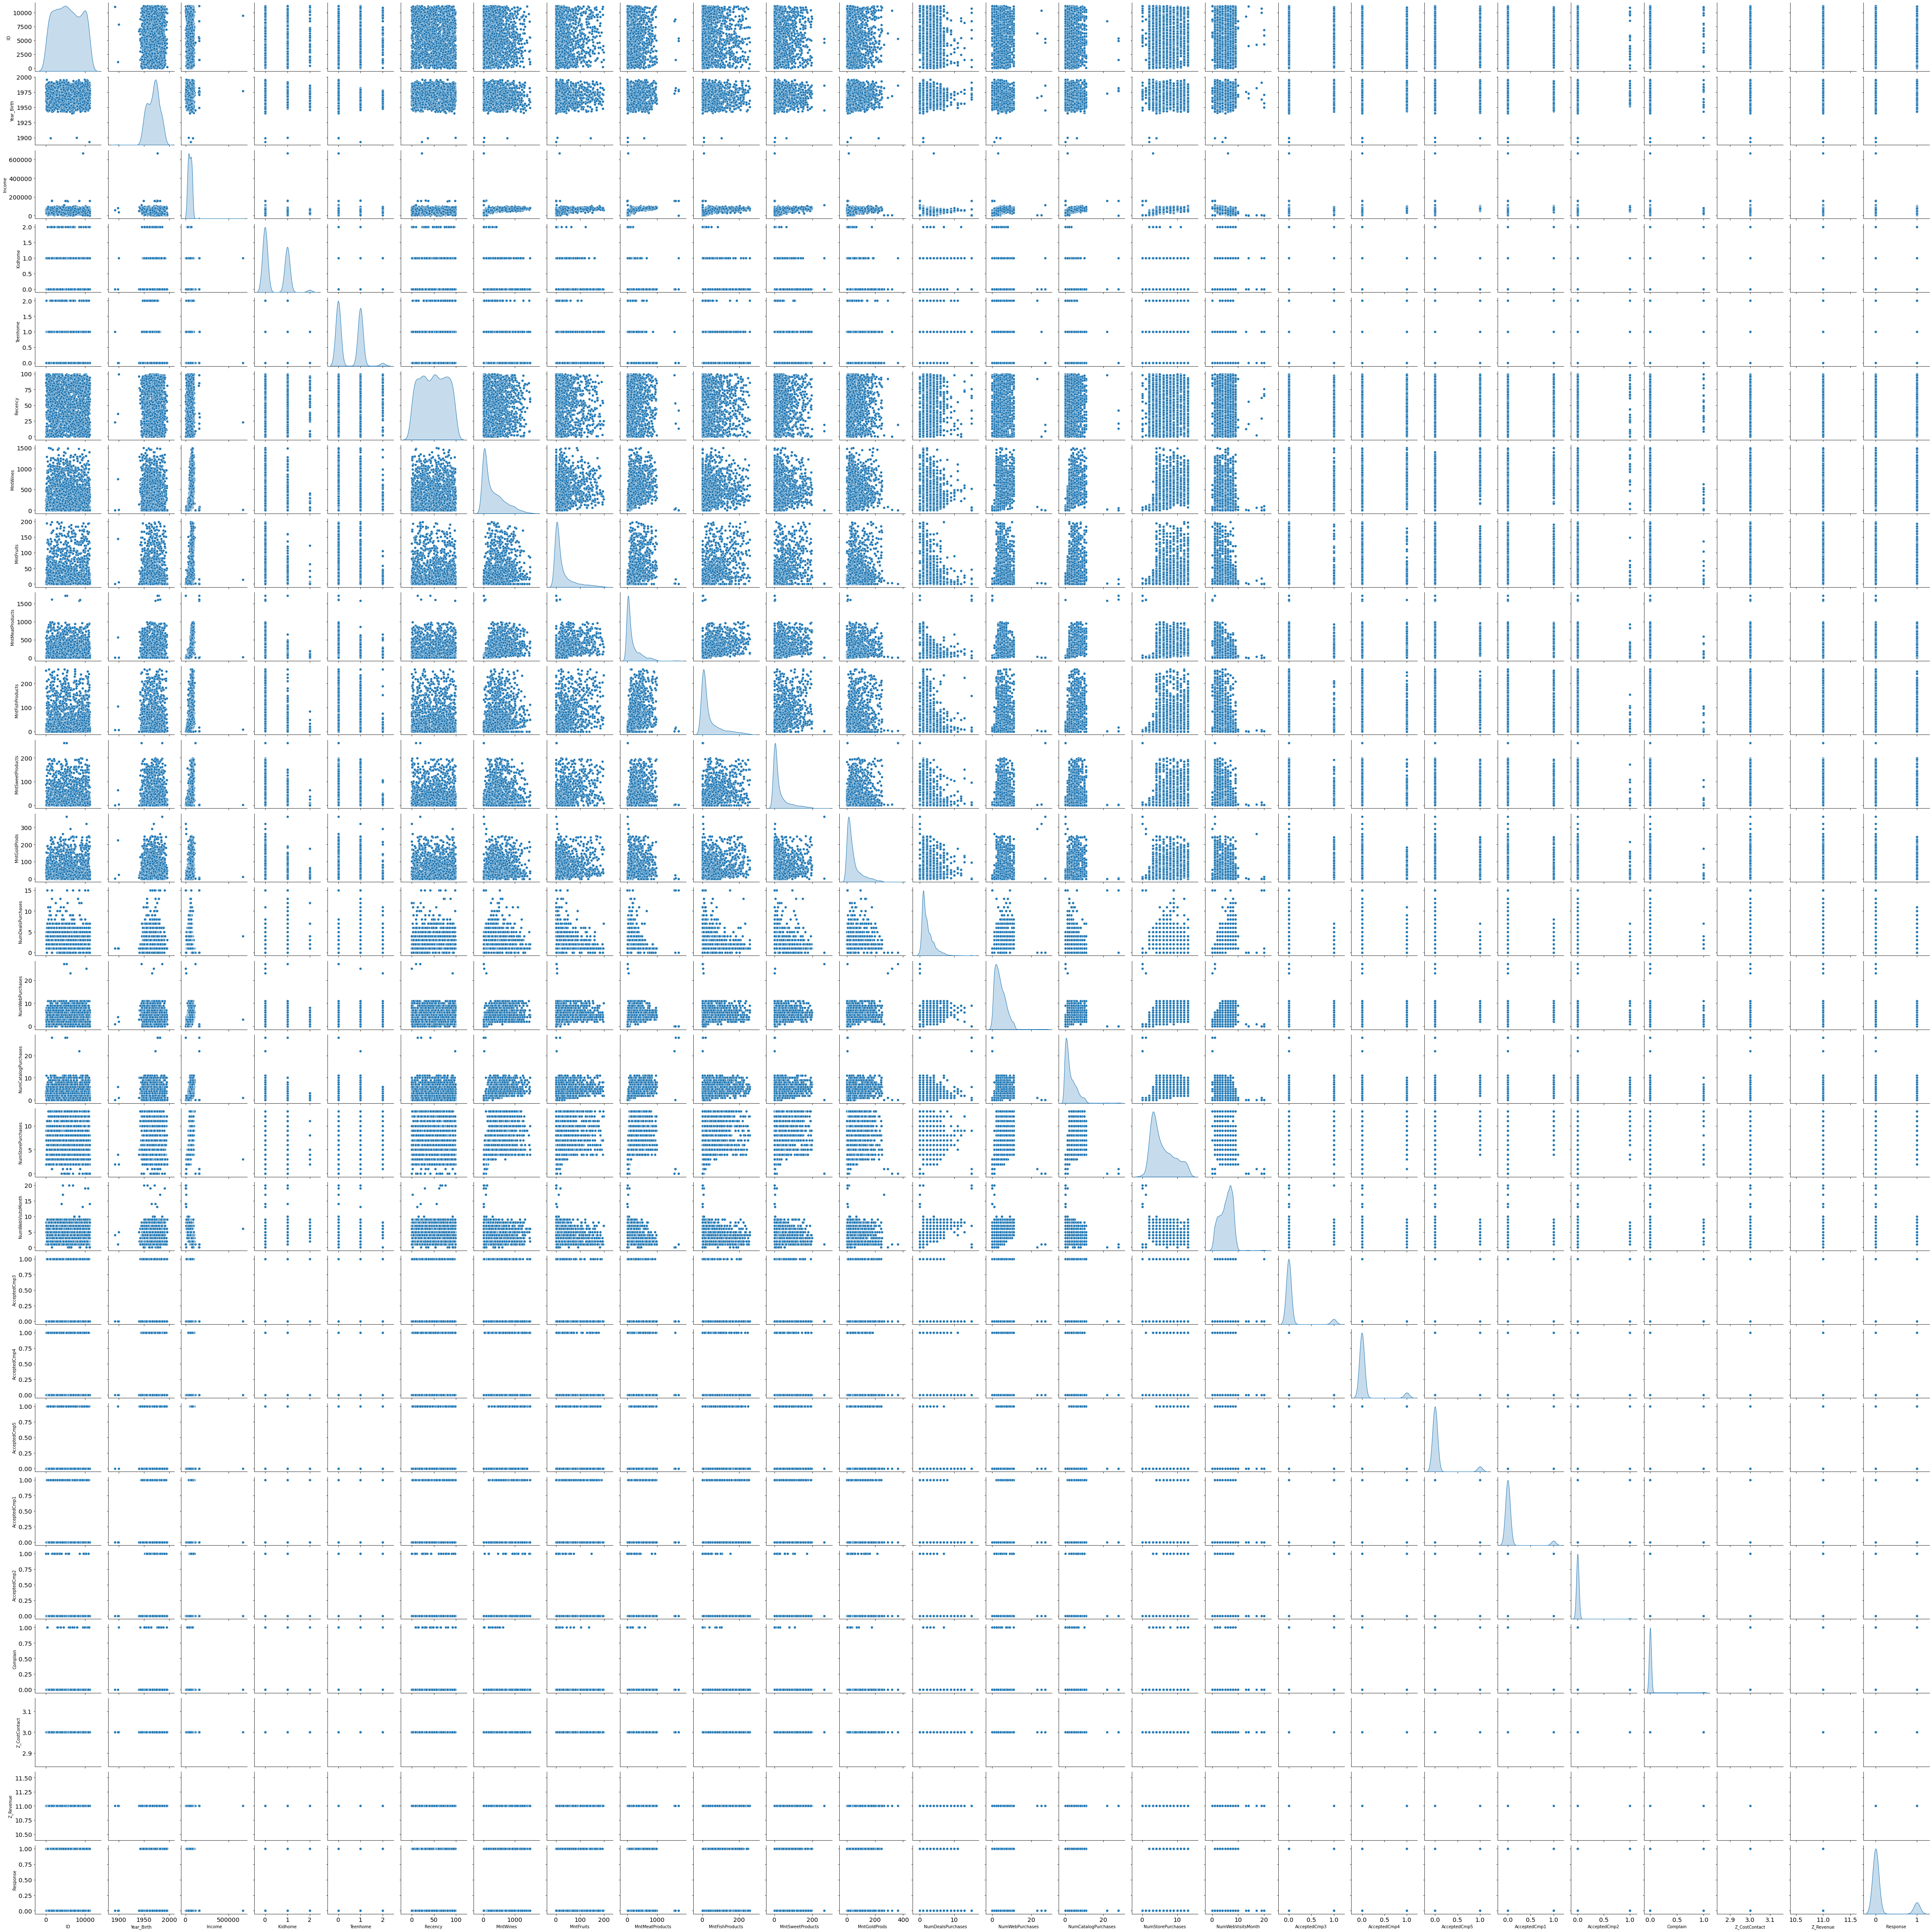

In [132]:
plt.figure(figsize=(15, 15))
sns.pairplot(df, diag_kind='kde')

## Mulitvariate Analysis

In [146]:
numericals4 = numericals.drop(['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain','Z_CostContact', 'Z_Revenue', 'Response'])
print(numericals4)
print(categoricals)
print(categoricals1)

Index(['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth'],
      dtype='object')
Index(['Education', 'Marital_Status'], dtype='object')
['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Complain', 'Response']


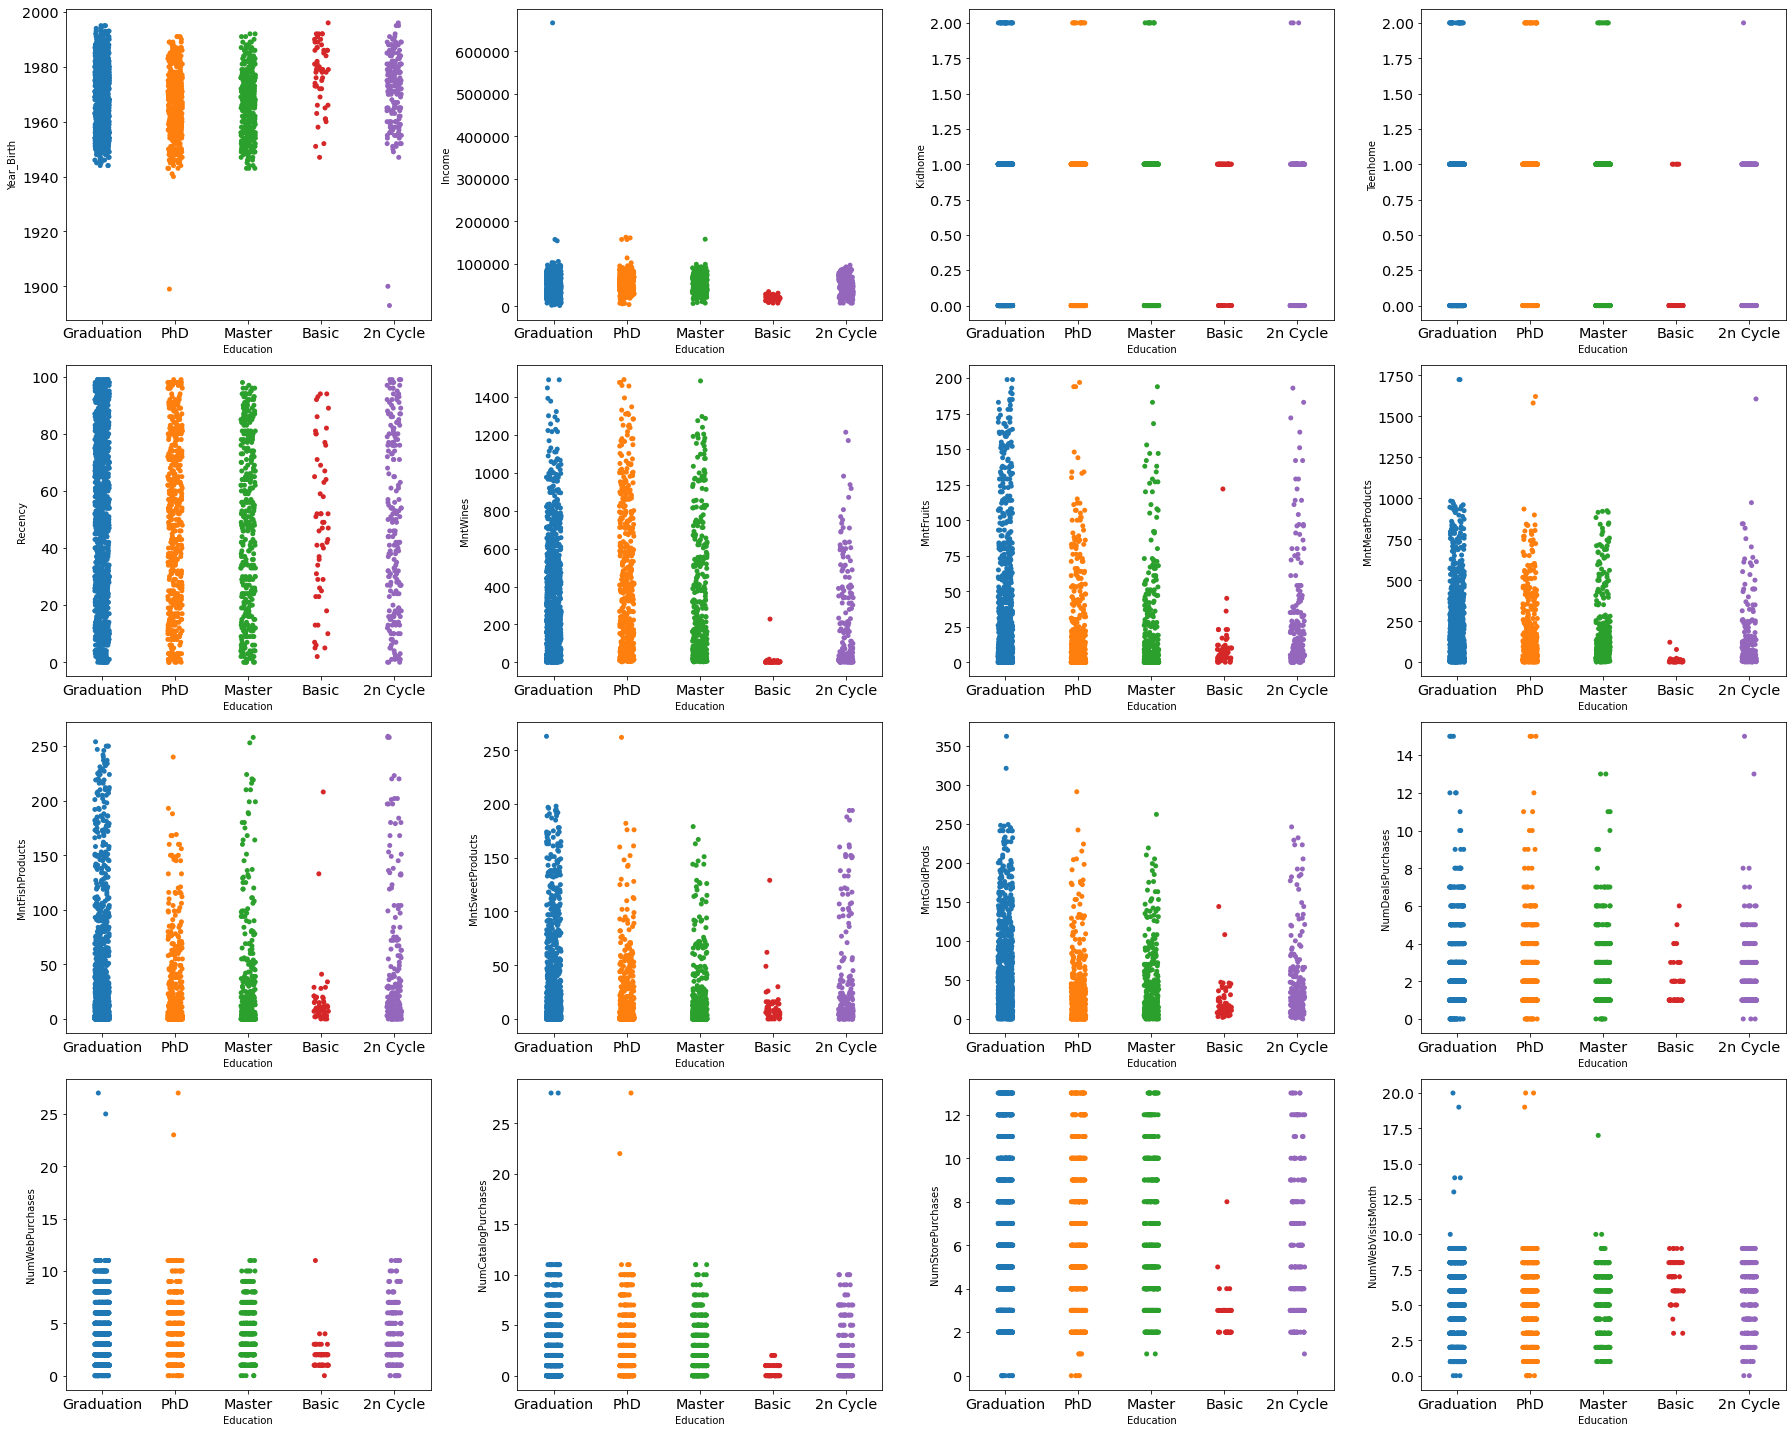

In [148]:
fig = plt.figure(figsize=(25, 20))
for i in range(0, len(numericals4)): # untuk setiap kolom numerik
    ax = fig.add_subplot(4, 4, i+1) # kita set posisi catplot/stripplotnya di layout
    sns.stripplot(ax=ax, data=df, x='Education', y=numericals4[i]) # gambar catplot/stripplotnya
    plt.tight_layout()

Insight yang didapat : <br>
* basic memiliki income relative kecil, sedangkan yang lain hampir sama di 100000 <br>
* basic jarang beli (mntproduk, numpurchase, numvisit : kecil)

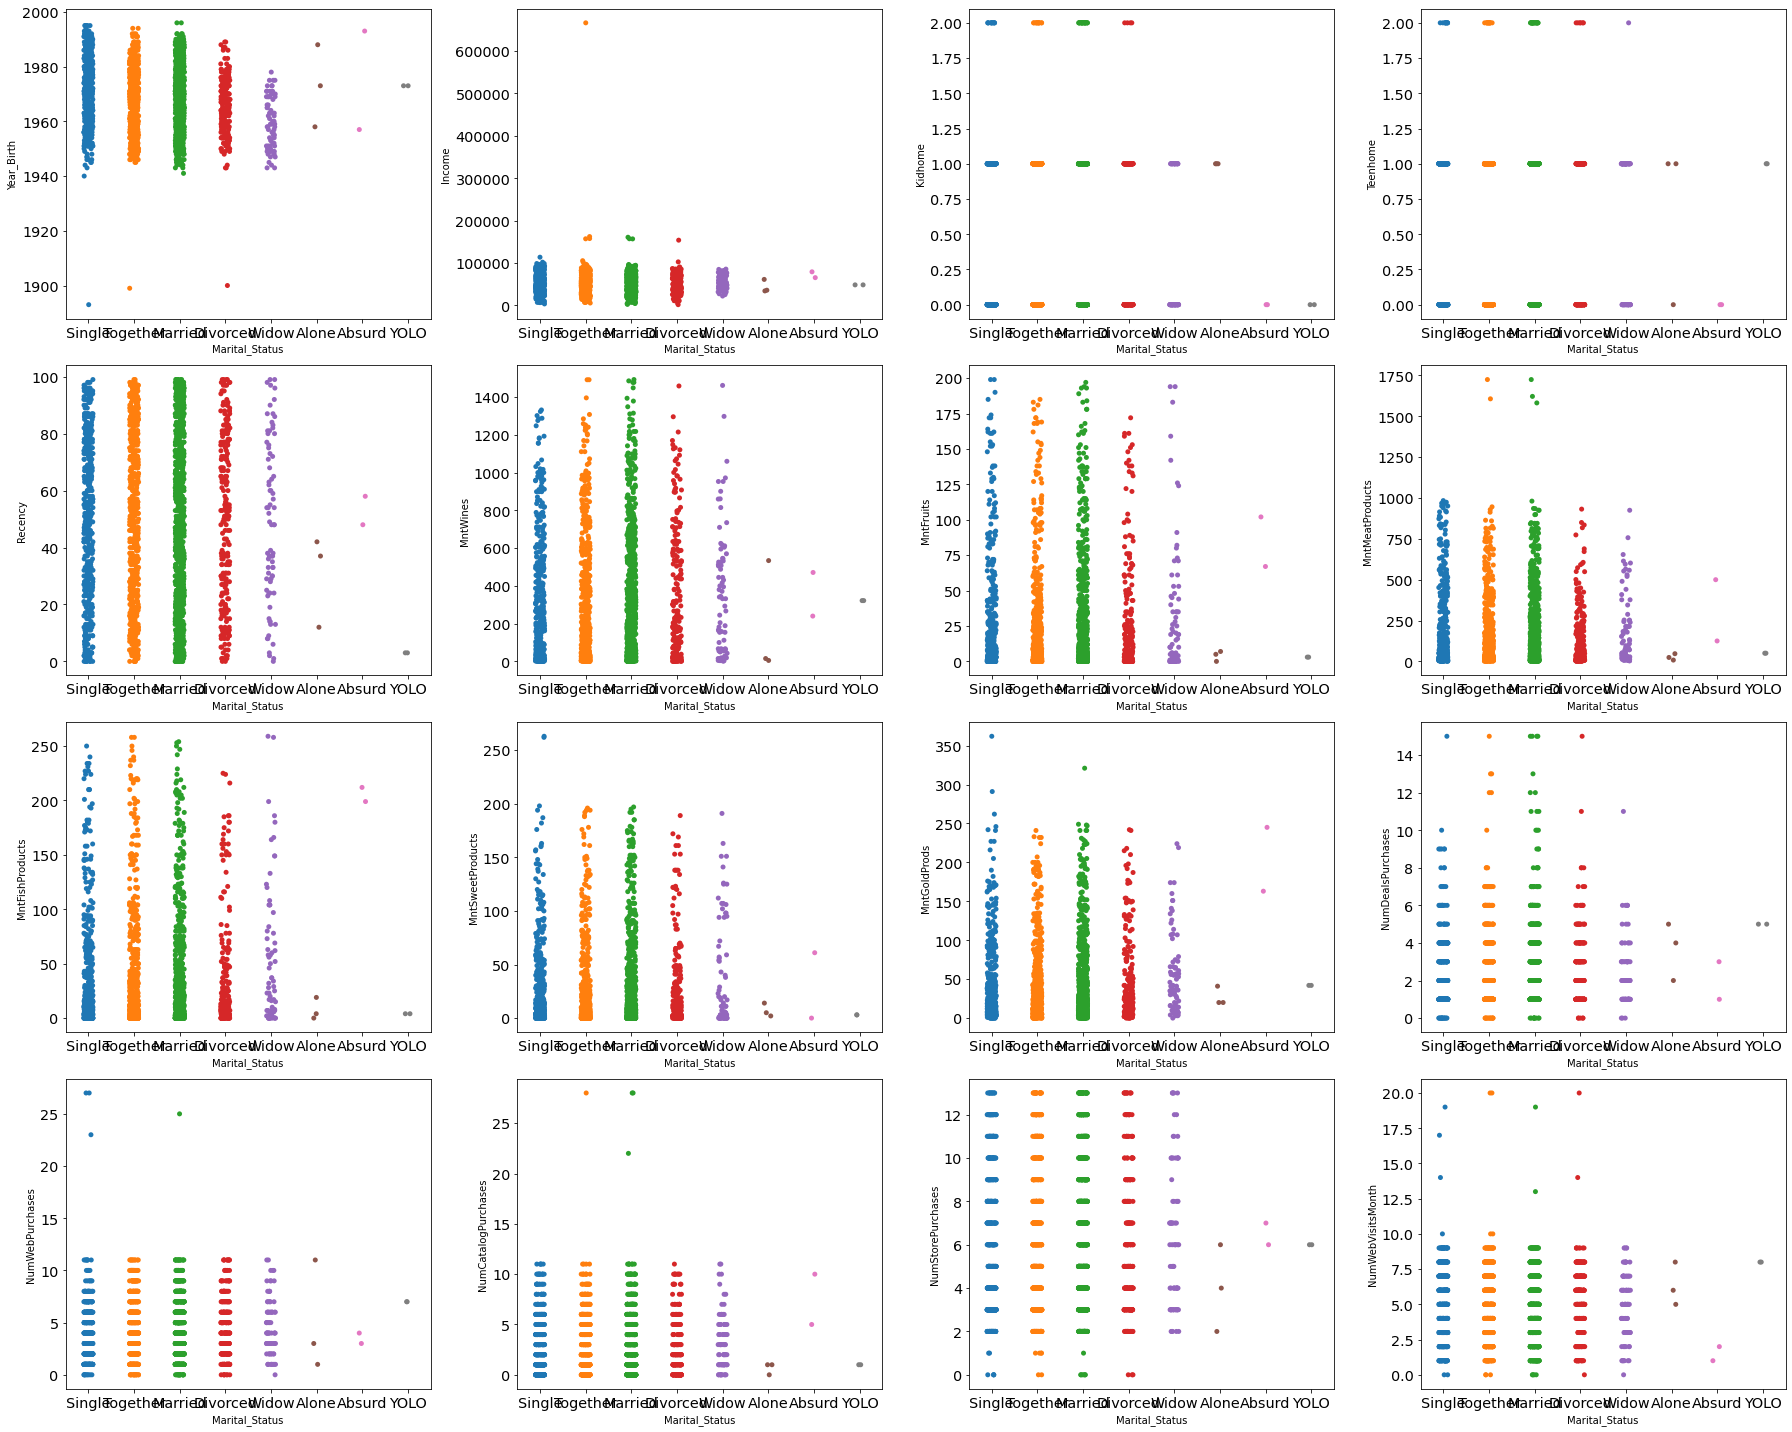

In [149]:
fig = plt.figure(figsize=(25, 20))
for i in range(0, len(numericals4)): # untuk setiap kolom numerik
    ax = fig.add_subplot(4, 4, i+1) # kita set posisi catplot/stripplotnya di layout
    sns.stripplot(ax=ax, data=df, x='Marital_Status', y=numericals4[i]) # gambar catplot/stripplotnya
    plt.tight_layout()

insight yang didapat : <br>
* alone, absurd, dan yolo datanya sangat sedikit, sehingga wajar jika timpang

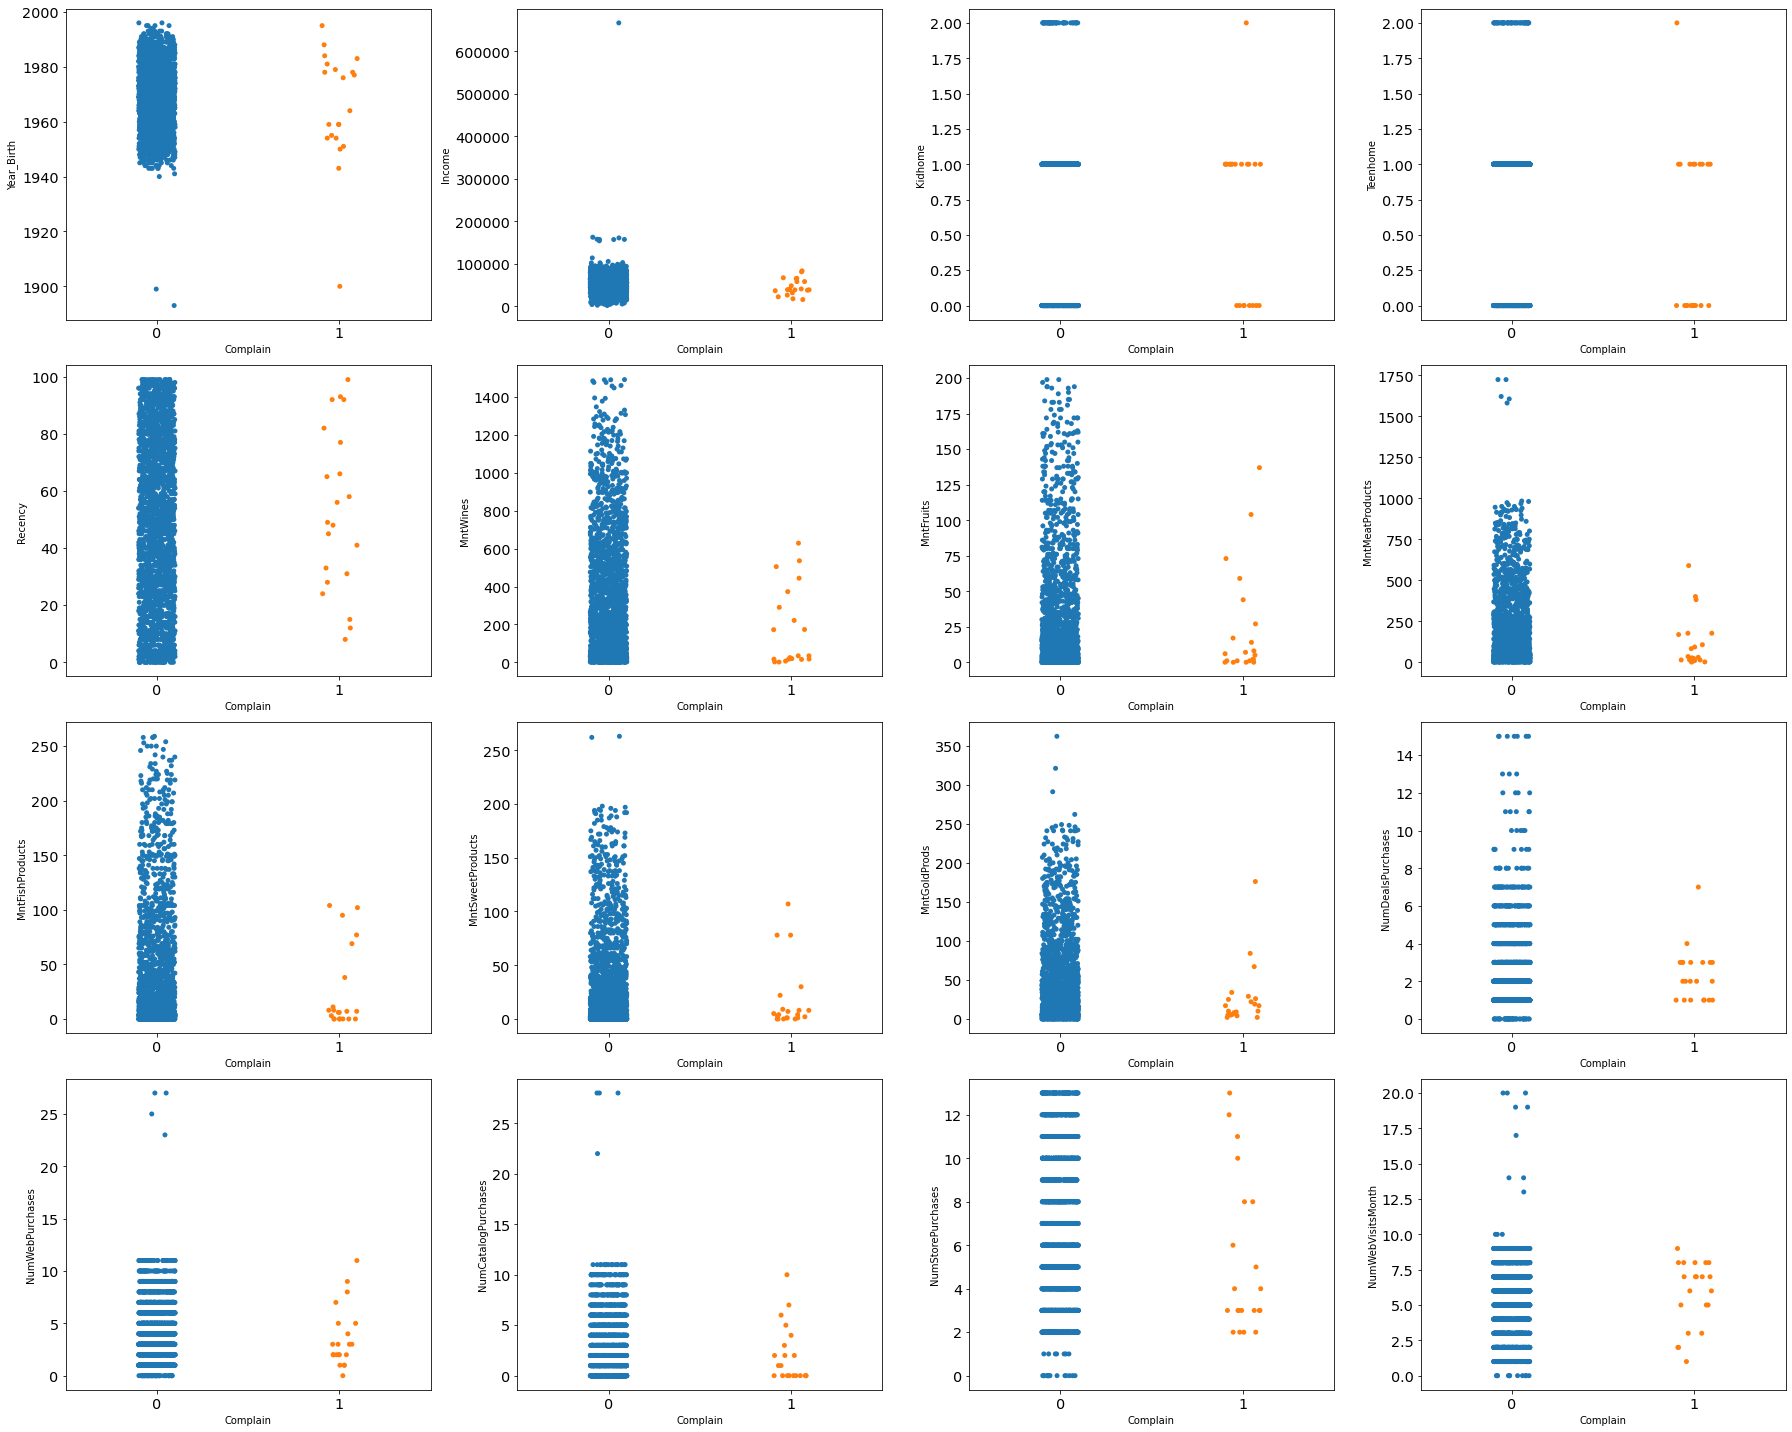

In [151]:
fig = plt.figure(figsize=(25, 20))
for i in range(0, len(numericals4)): # untuk setiap kolom numerik
    ax = fig.add_subplot(4, 4, i+1) # kita set posisi catplot/stripplotnya di layout
    sns.stripplot(ax=ax, data=df, x='Complain', y=numericals4[i]) # gambar catplot/stripplotnya
    plt.tight_layout()

insight yang didapat :  <br>
* complain ada pada customer dengan mnt produk yang sedikit ke menengah

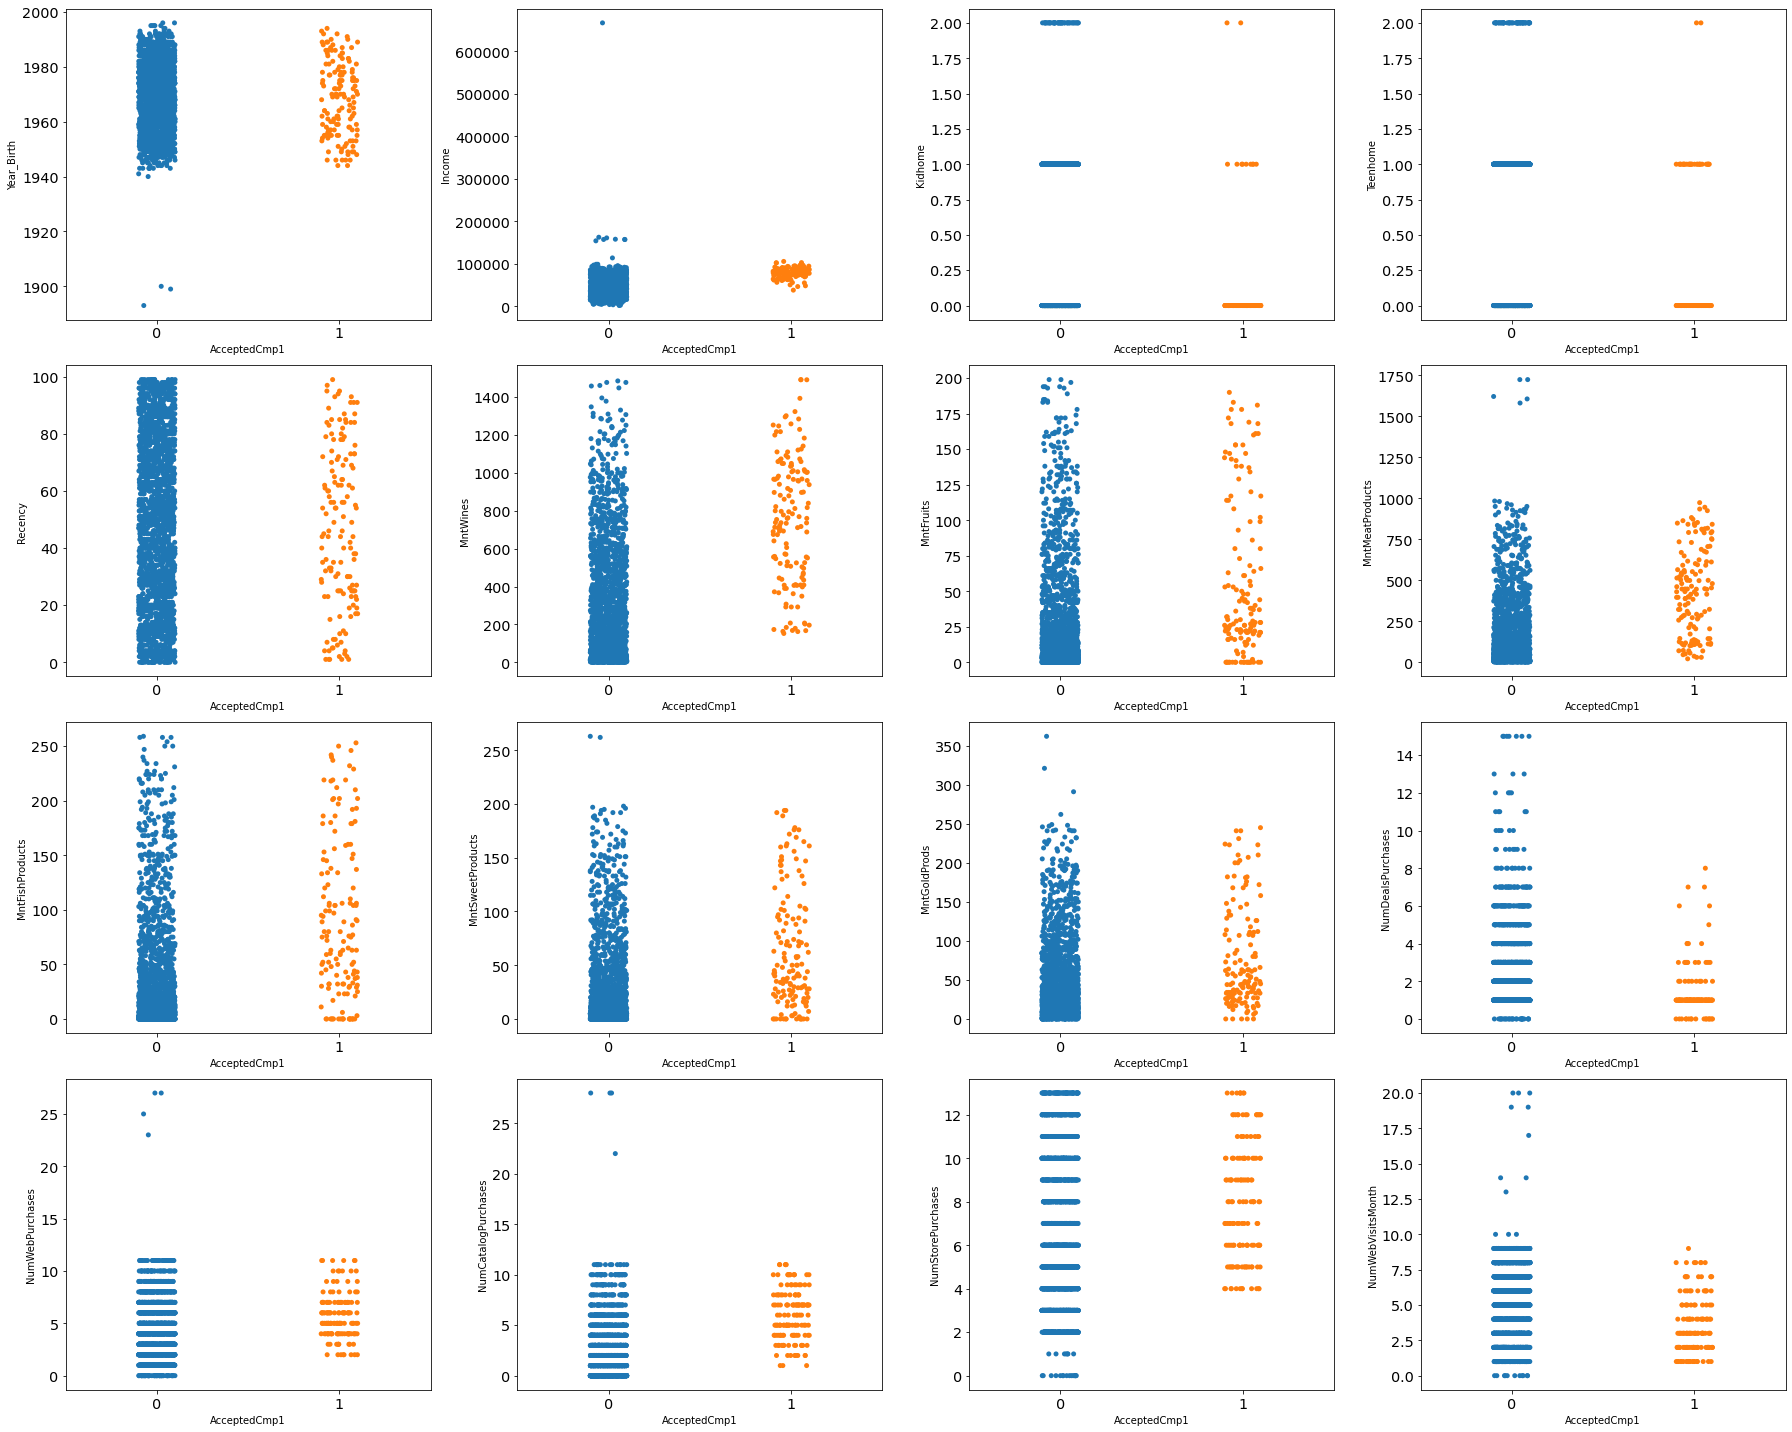

In [150]:
fig = plt.figure(figsize=(25, 20))
for i in range(0, len(numericals4)): # untuk setiap kolom numerik
    ax = fig.add_subplot(4, 4, i+1) # kita set posisi catplot/stripplotnya di layout
    sns.stripplot(ax=ax, data=df, x='AcceptedCmp1', y=numericals4[i]) # gambar catplot/stripplotnya
    plt.tight_layout()

insight yang didapat : <br>
* customer yg acceptcmp1, itu minimal sudah datang ke store 4 kali

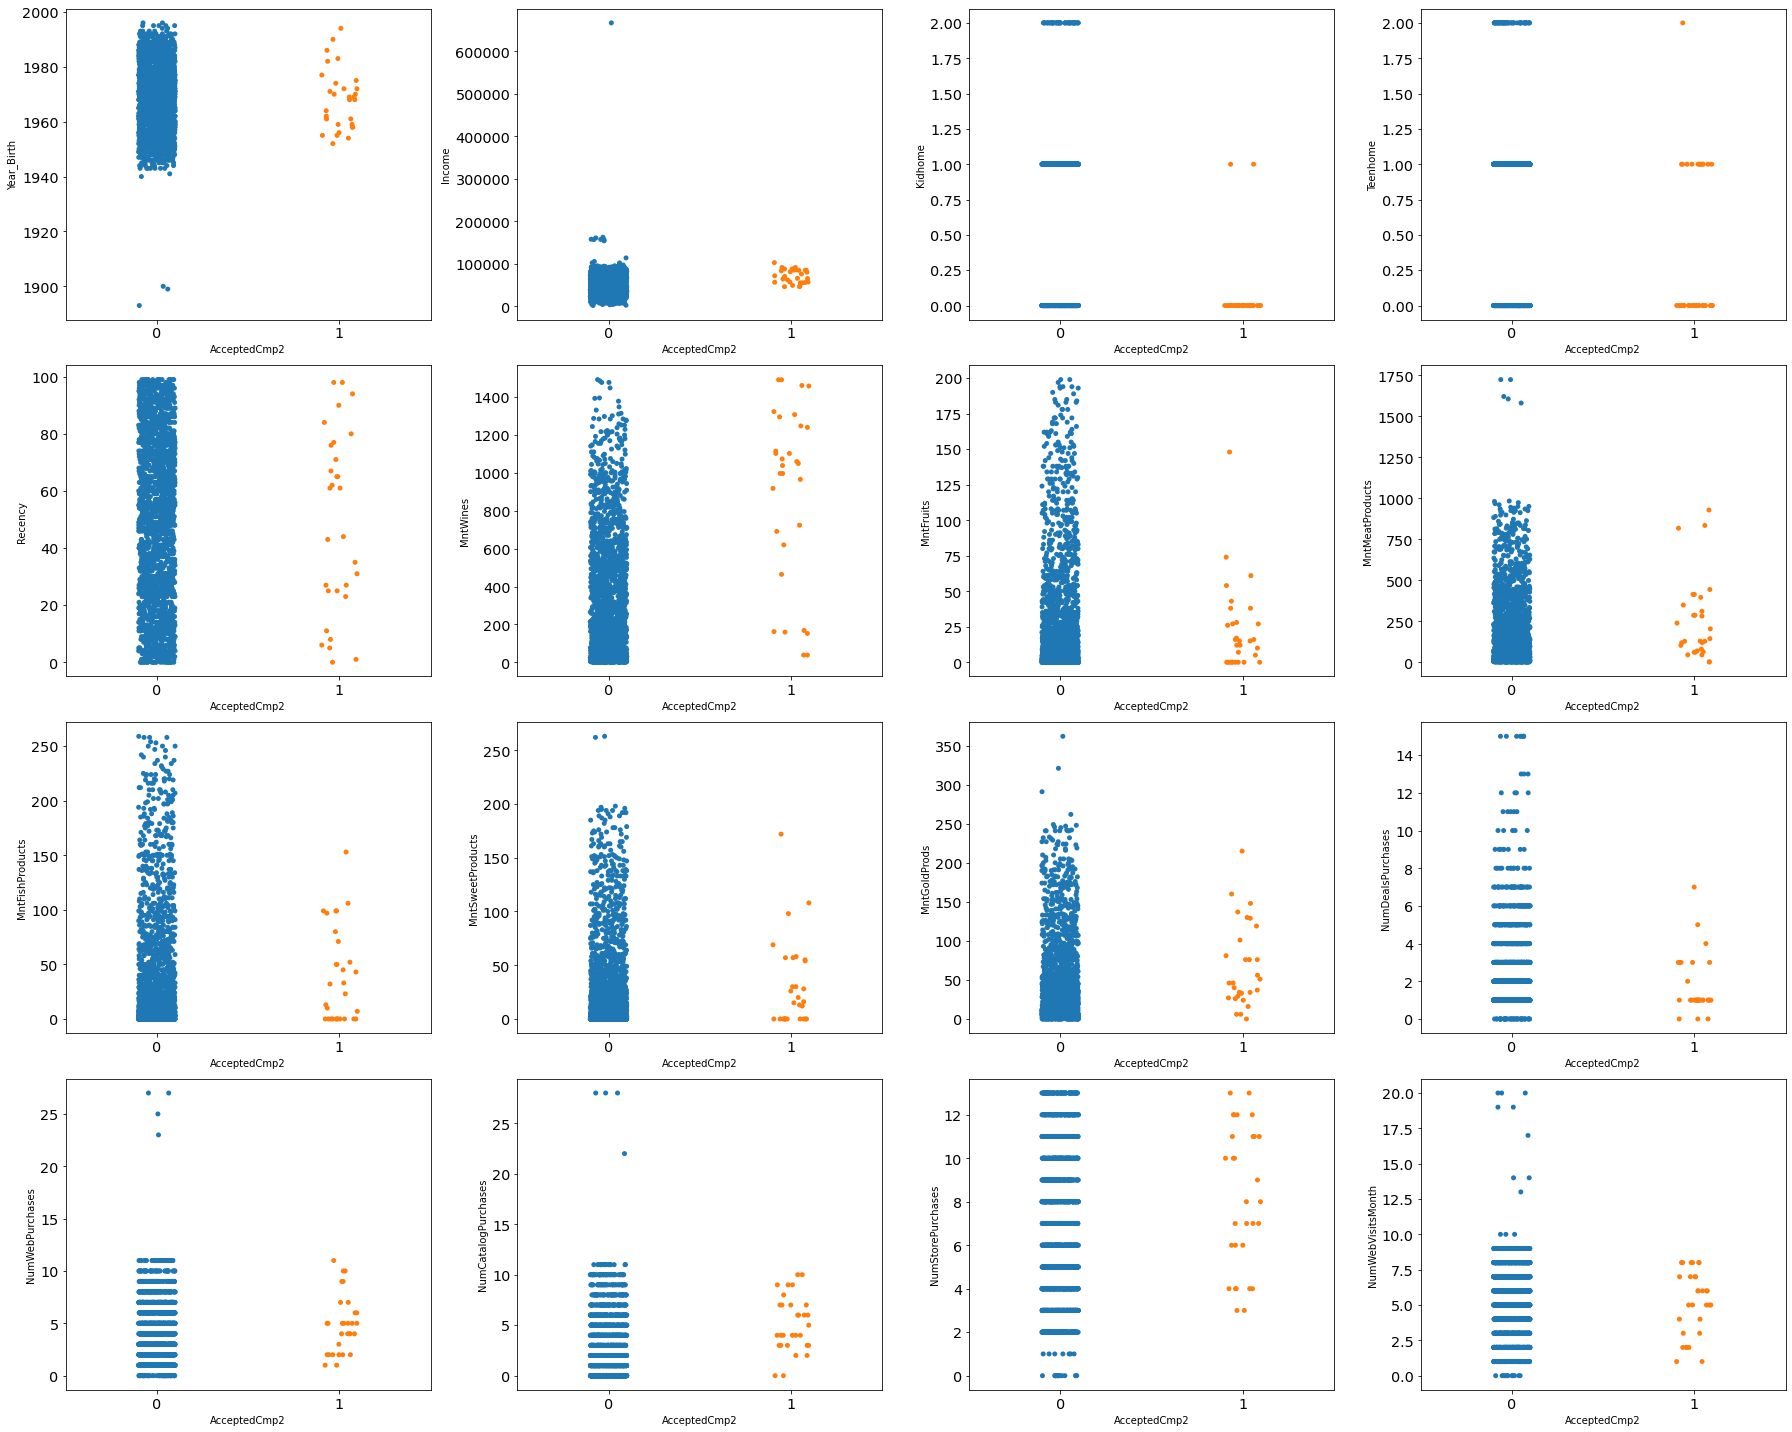

In [152]:
fig = plt.figure(figsize=(25, 20))
for i in range(0, len(numericals4)): # untuk setiap kolom numerik
    ax = fig.add_subplot(4, 4, i+1) # kita set posisi catplot/stripplotnya di layout
    sns.stripplot(ax=ax, data=df, x='AcceptedCmp2', y=numericals4[i]) # gambar catplot/stripplotnya
    plt.tight_layout()

insight yang didapat : <br>
* customer yg acceptcmp2, itu minimal sudah datang ke store 3 kali

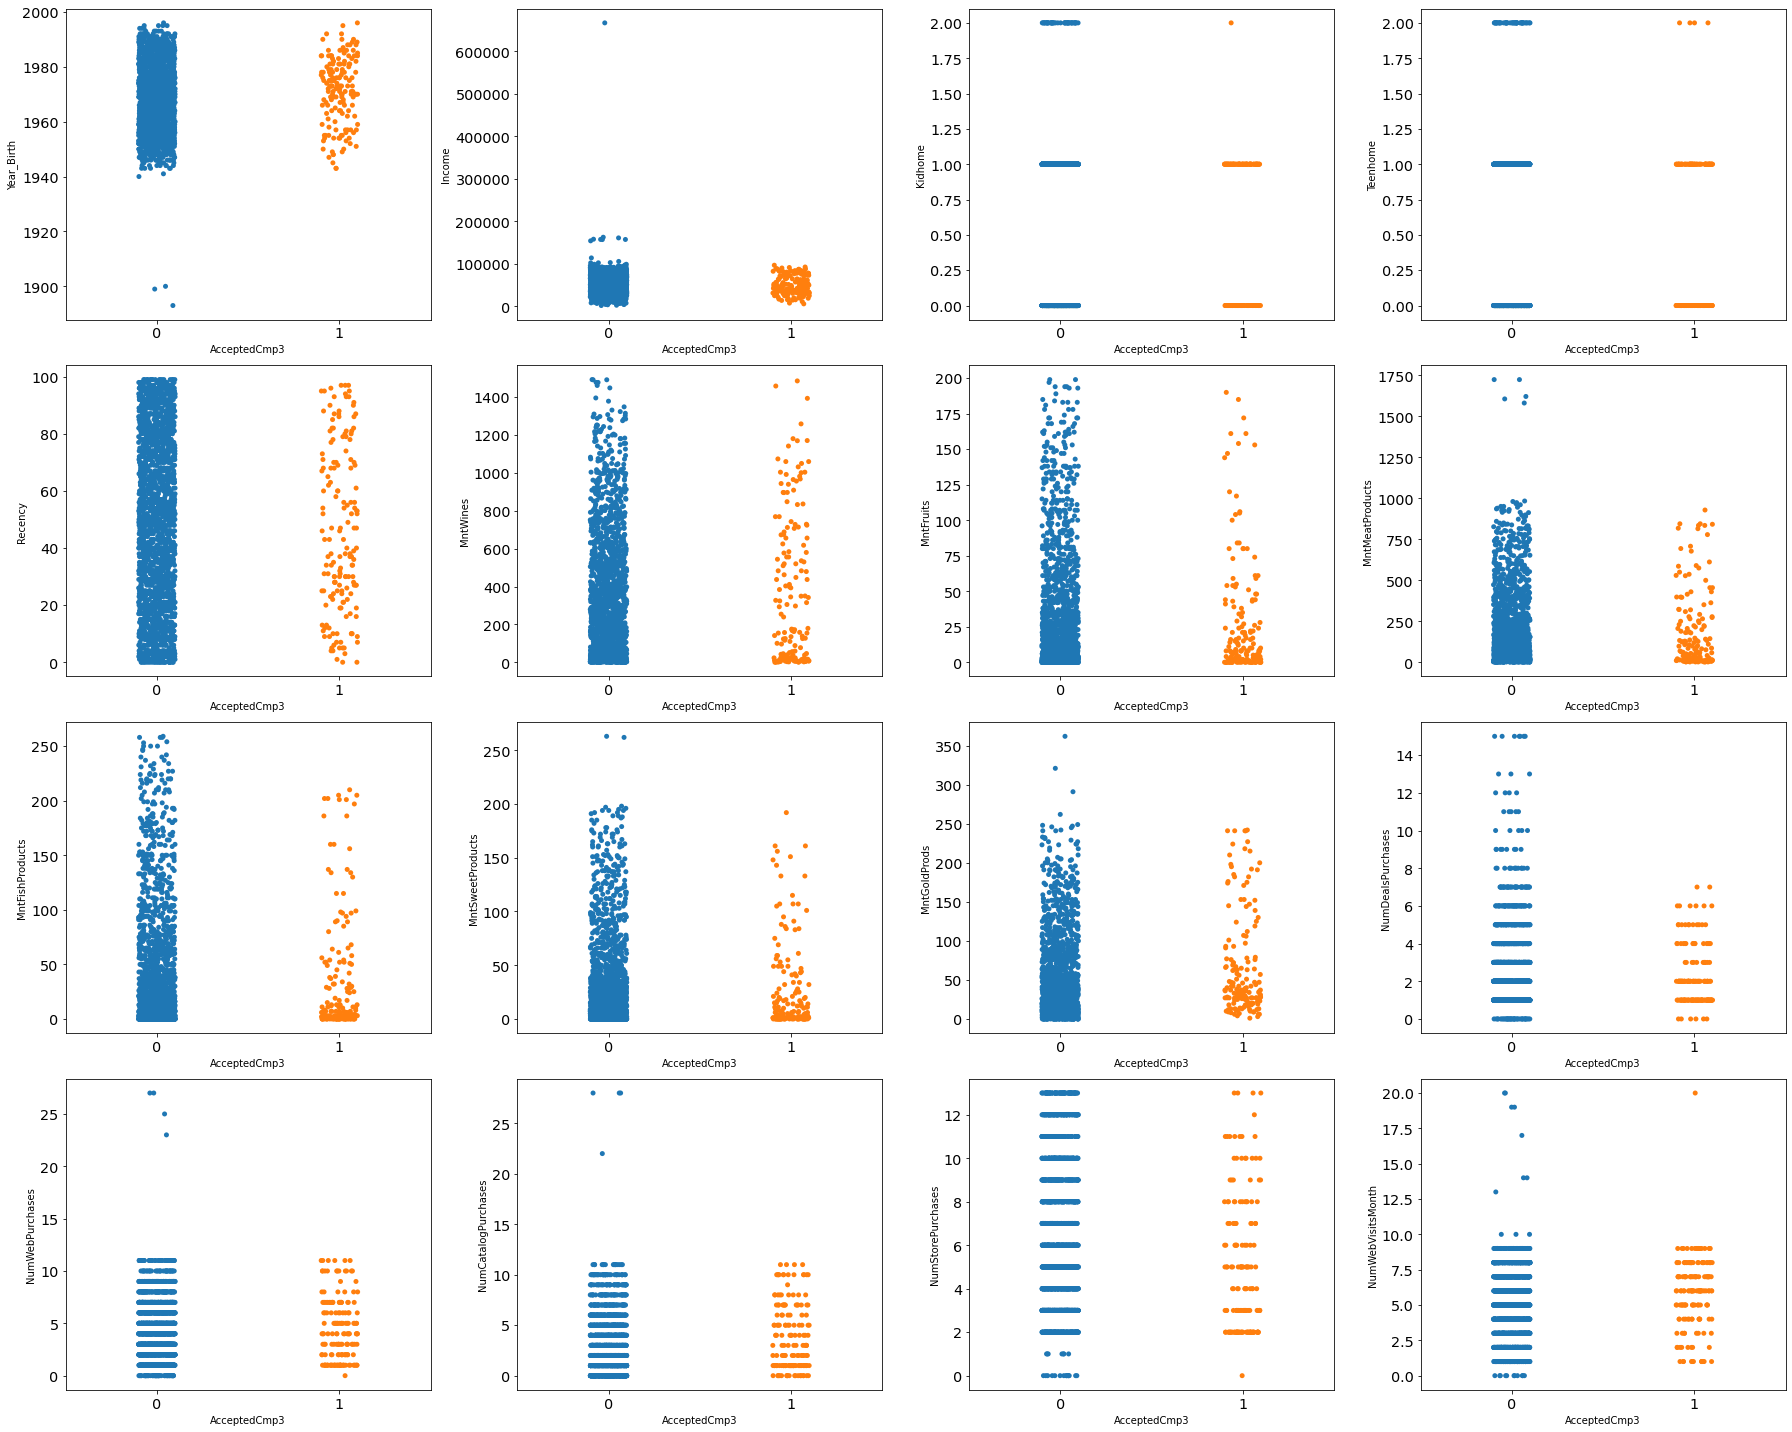

In [153]:
fig = plt.figure(figsize=(25, 20))
for i in range(0, len(numericals4)): # untuk setiap kolom numerik
    ax = fig.add_subplot(4, 4, i+1) # kita set posisi catplot/stripplotnya di layout
    sns.stripplot(ax=ax, data=df, x='AcceptedCmp3', y=numericals4[i]) # gambar catplot/stripplotnya
    plt.tight_layout()

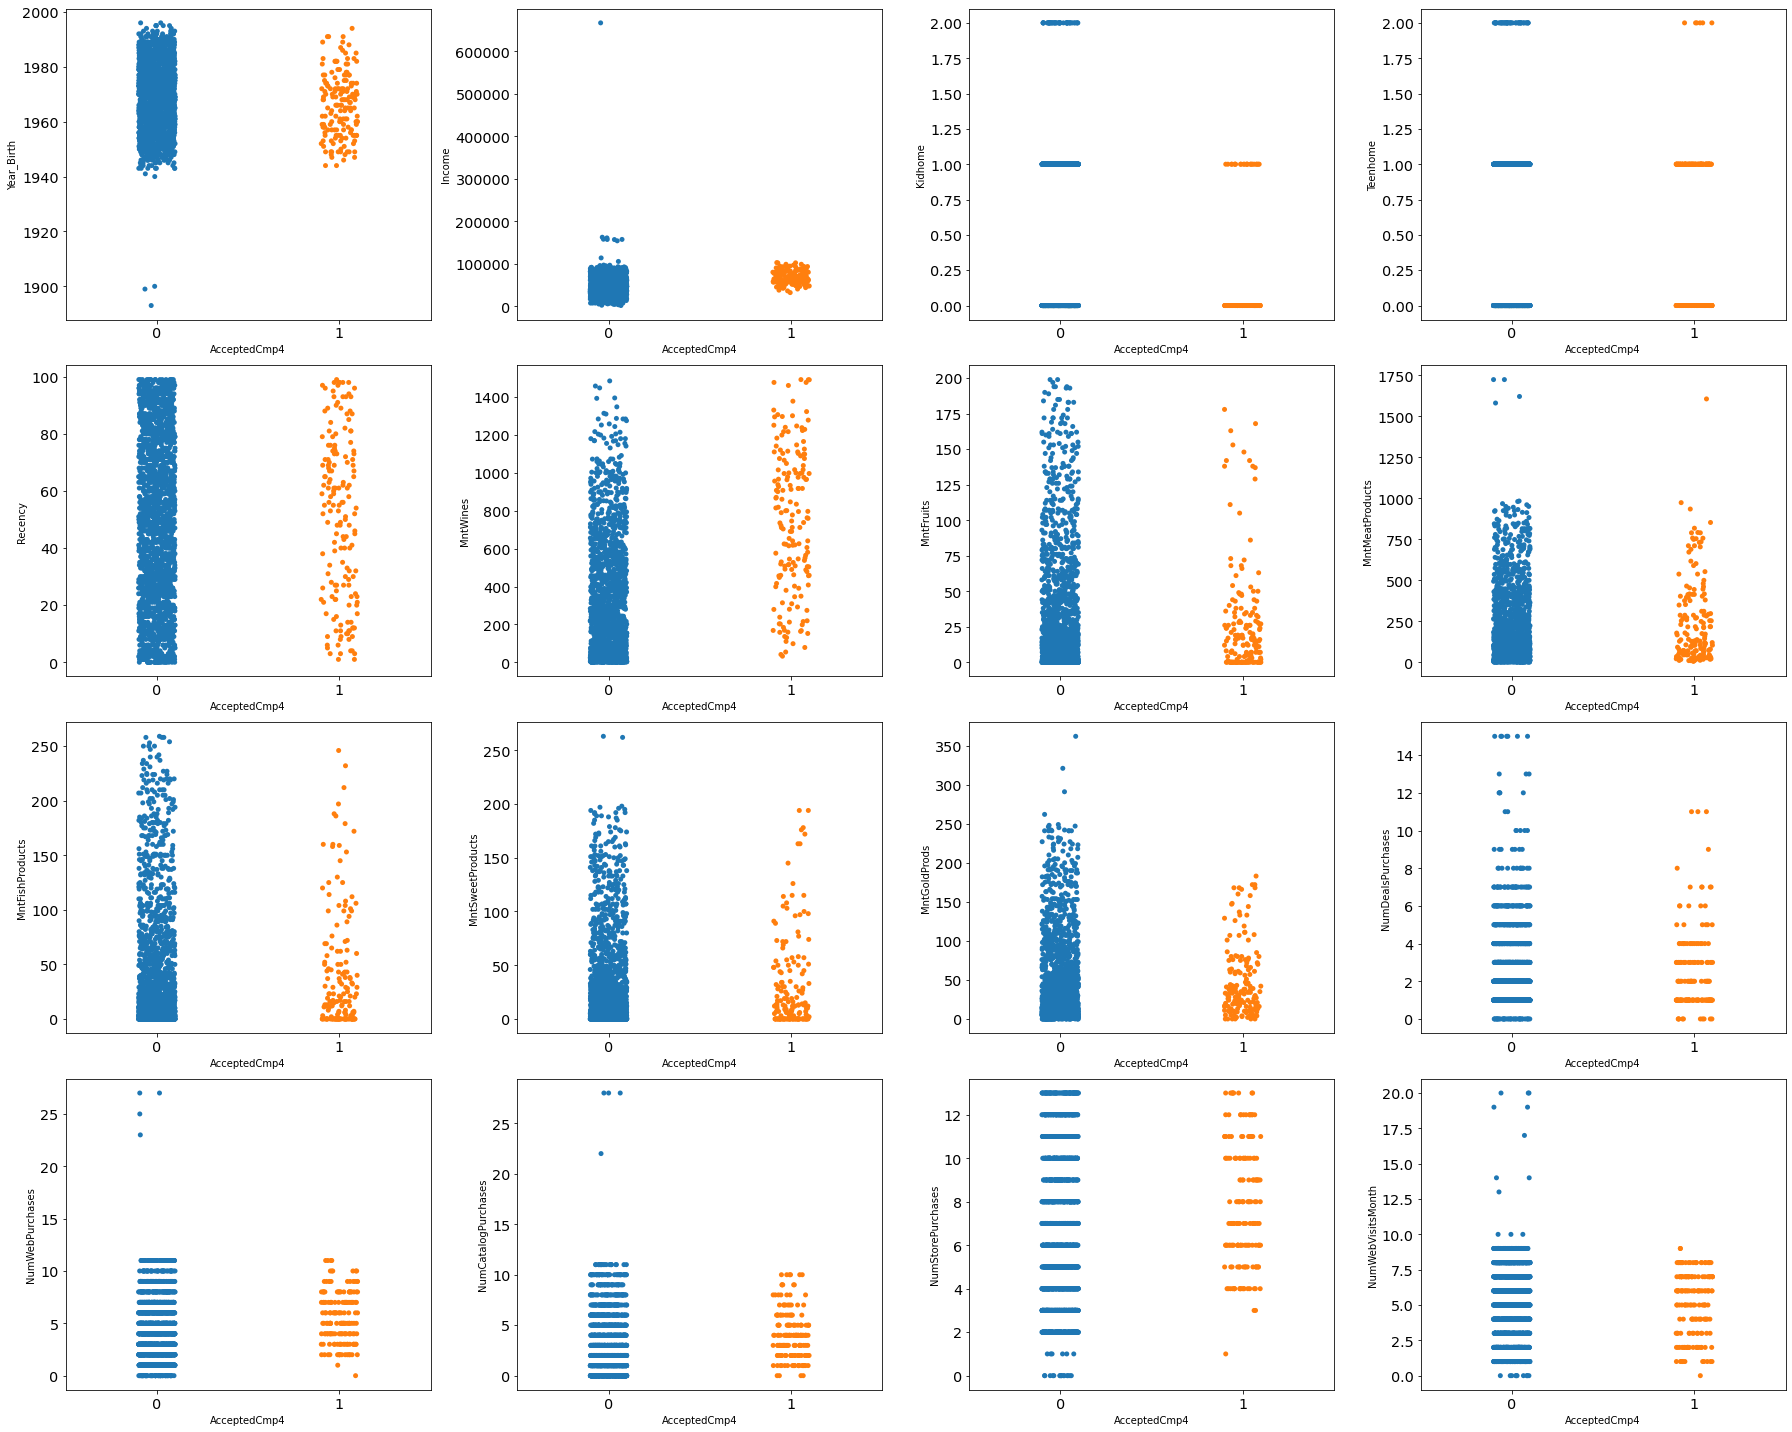

In [154]:
fig = plt.figure(figsize=(25, 20))
for i in range(0, len(numericals4)): # untuk setiap kolom numerik
    ax = fig.add_subplot(4, 4, i+1) # kita set posisi catplot/stripplotnya di layout
    sns.stripplot(ax=ax, data=df, x='AcceptedCmp4', y=numericals4[i]) # gambar catplot/stripplotnya
    plt.tight_layout()

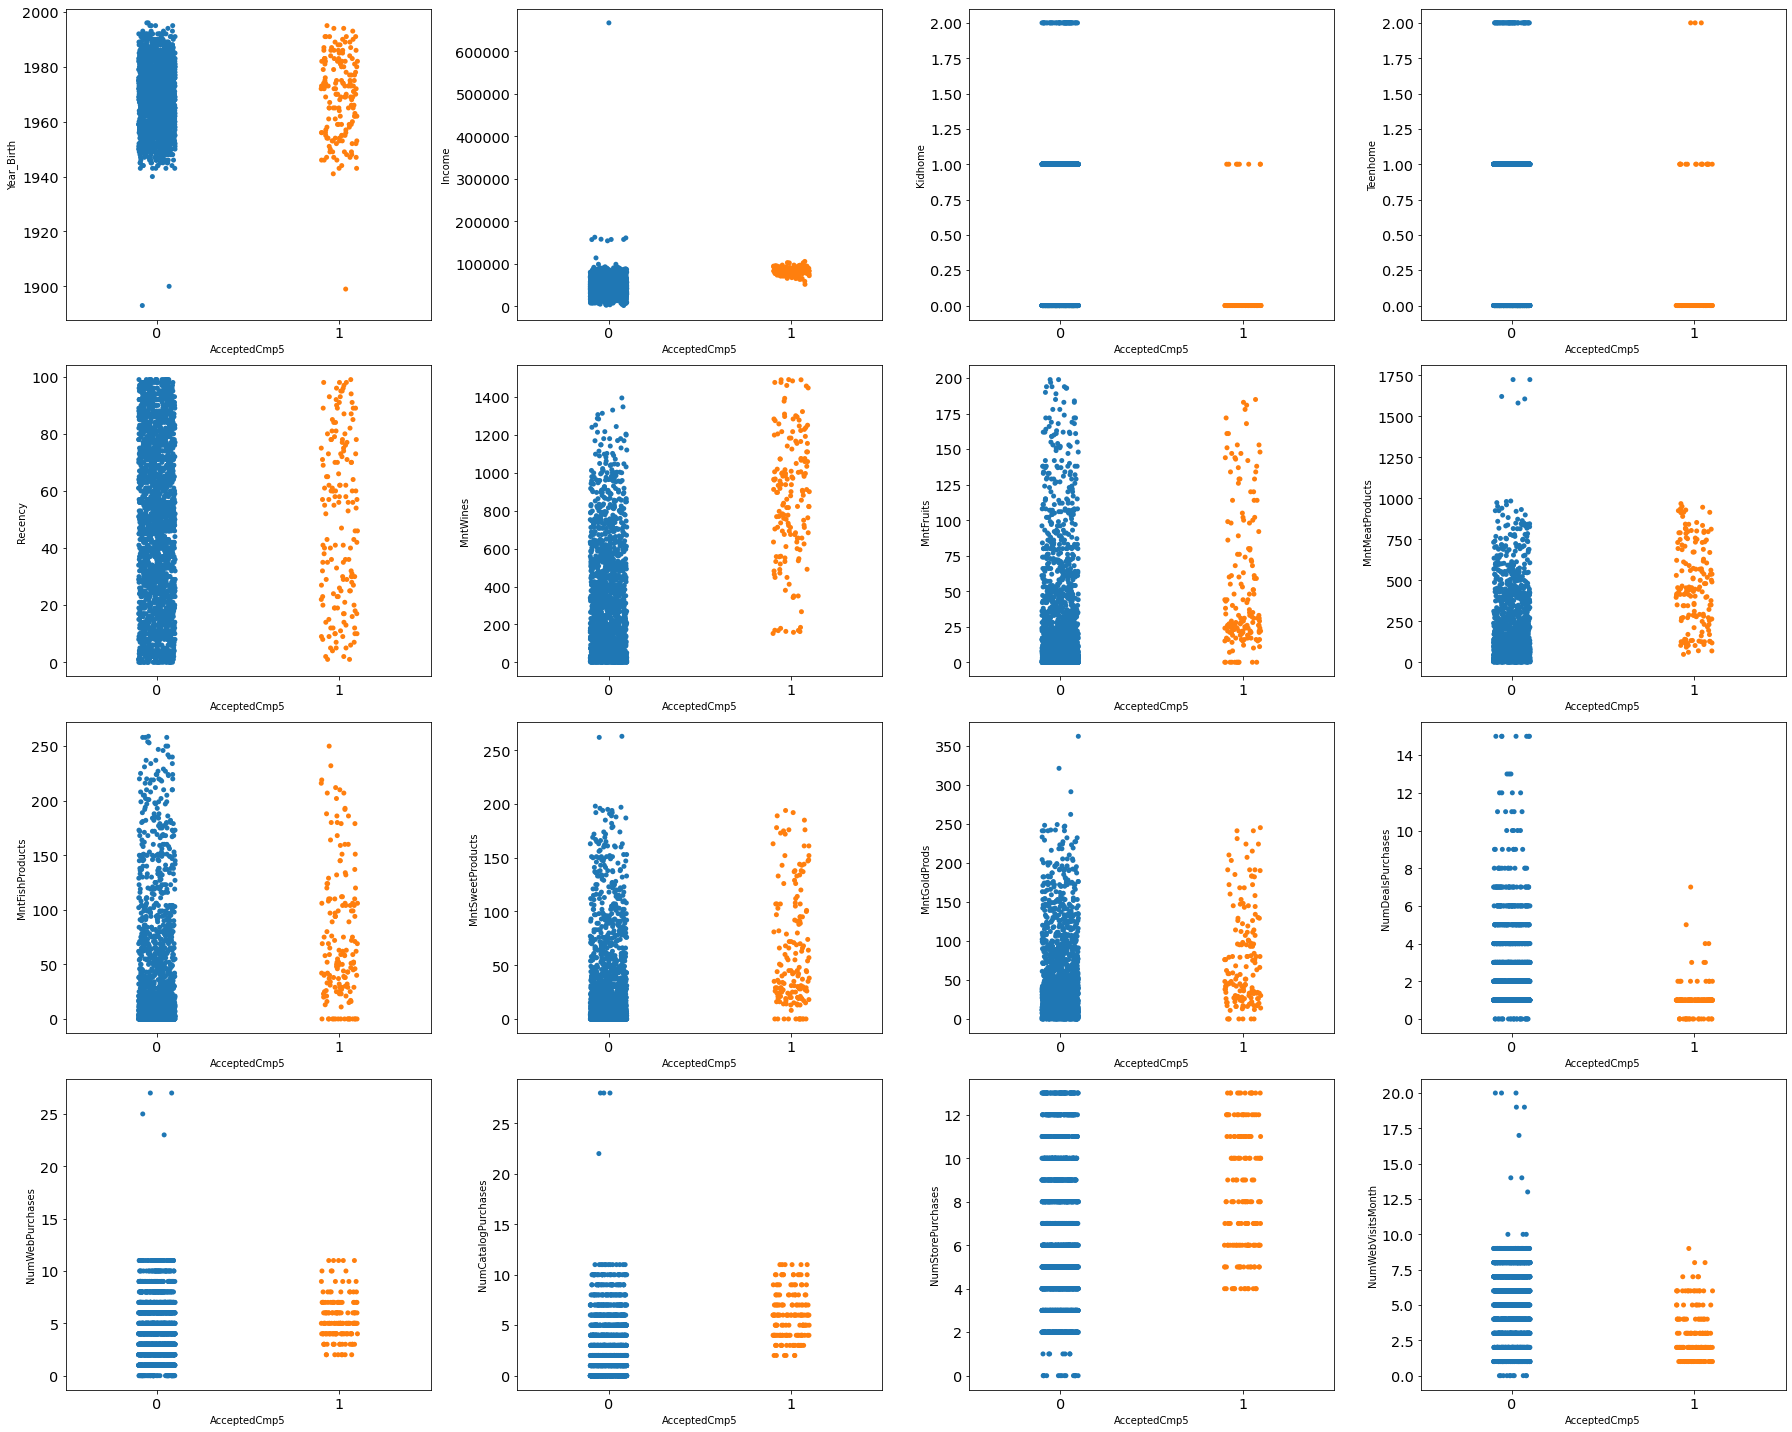

In [155]:
fig = plt.figure(figsize=(25, 20))
for i in range(0, len(numericals4)): # untuk setiap kolom numerik
    ax = fig.add_subplot(4, 4, i+1) # kita set posisi catplot/stripplotnya di layout
    sns.stripplot(ax=ax, data=df, x='AcceptedCmp5', y=numericals4[i]) # gambar catplot/stripplotnya
    plt.tight_layout()

insight yang didapat : <br>
* customer yg acceptcmp5, itu minimal sudah datang ke store 4 kali

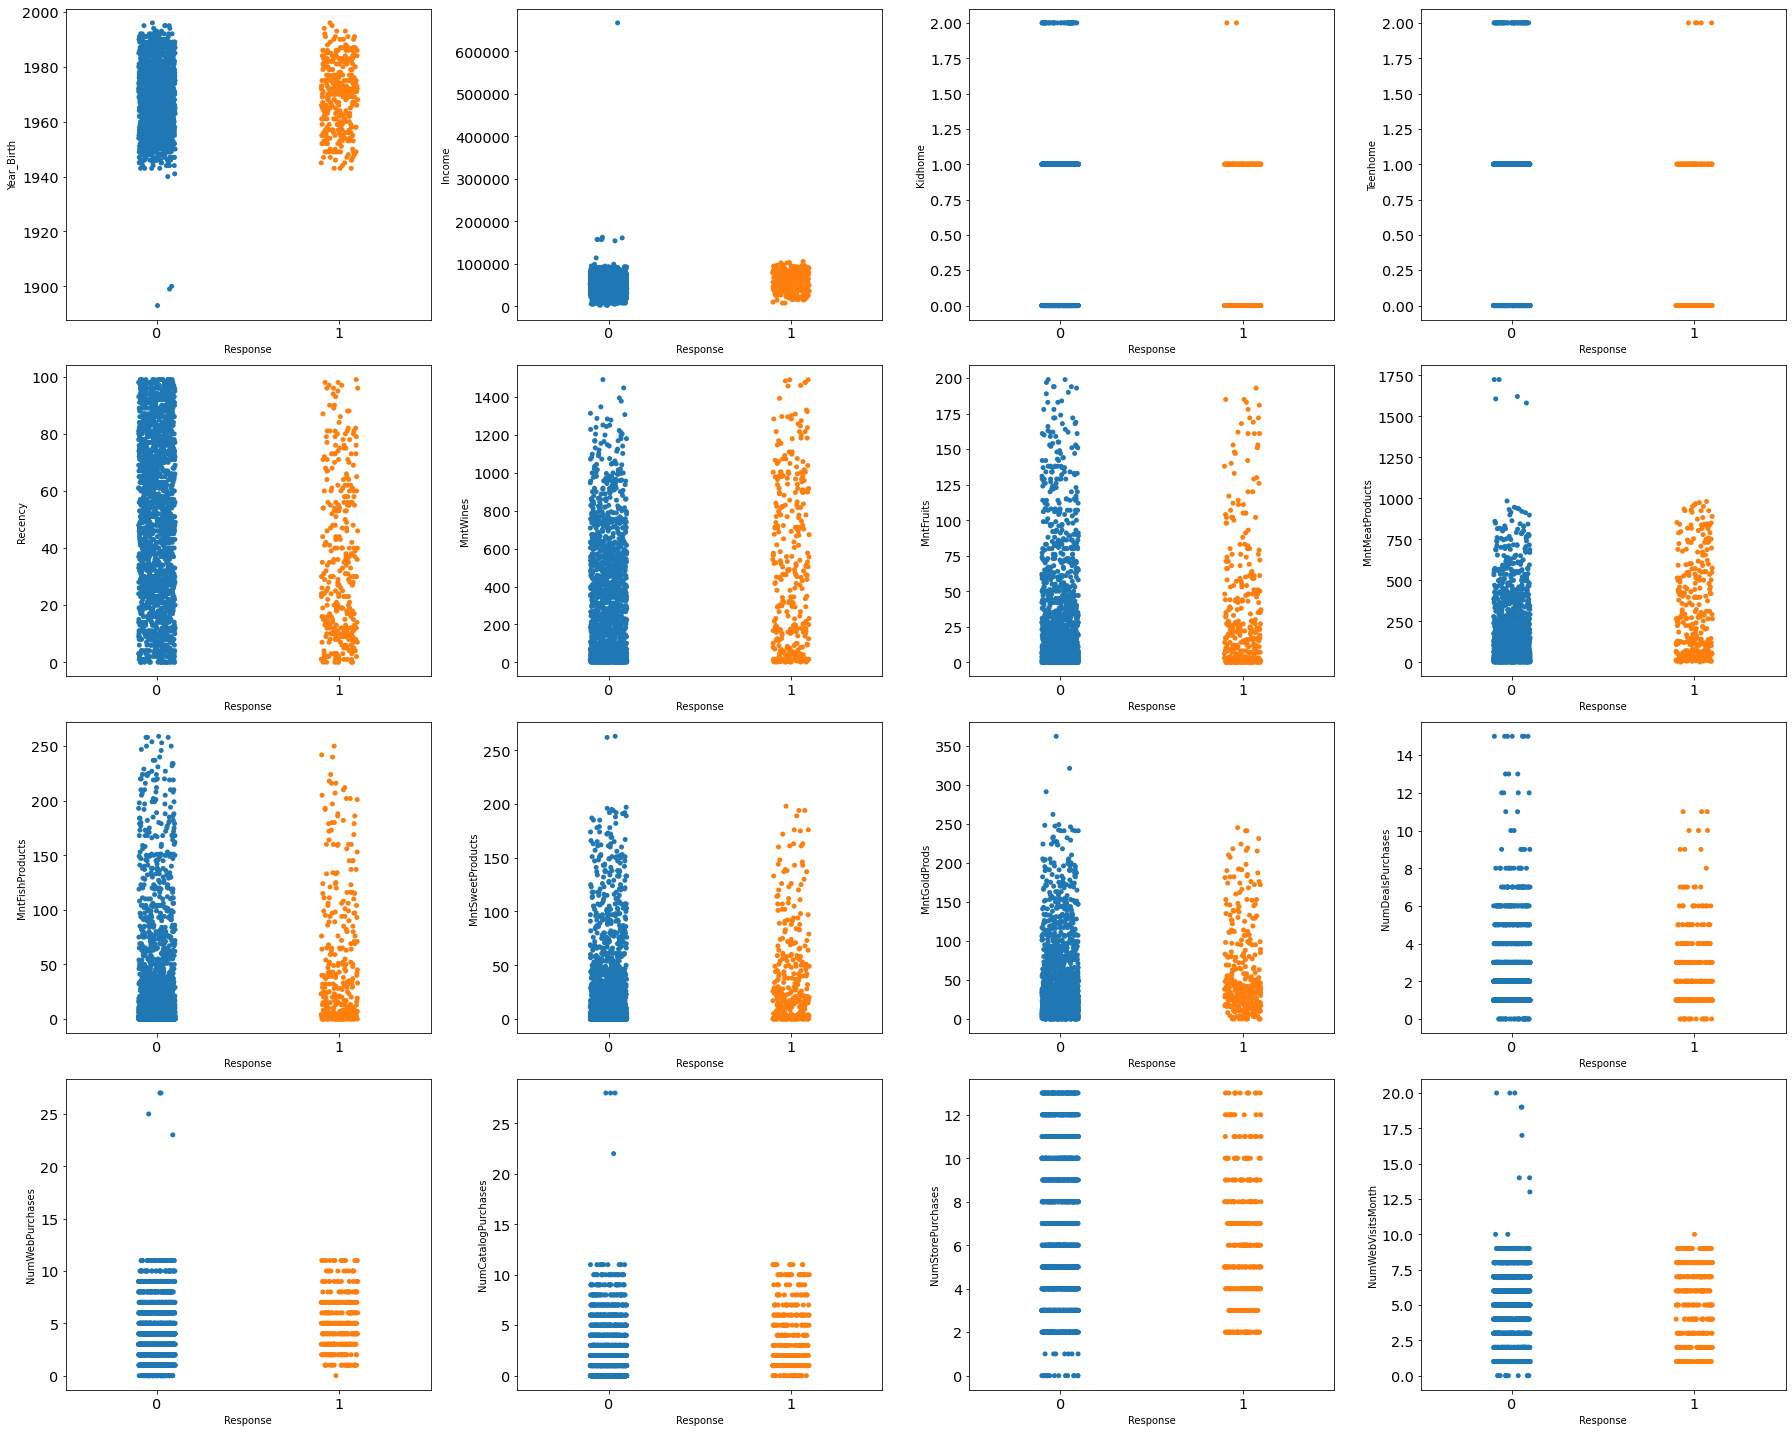

In [156]:
fig = plt.figure(figsize=(25, 20))
for i in range(0, len(numericals4)): # untuk setiap kolom numerik
    ax = fig.add_subplot(4, 4, i+1) # kita set posisi catplot/stripplotnya di layout
    sns.stripplot(ax=ax, data=df, x='Response', y=numericals4[i]) # gambar catplot/stripplotnya
    plt.tight_layout()

insight yang didapat : <br>
* customer yg response, itu minimal sudah datang ke store 2 kali